# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Some states have low participation rate in SAT test. Which one of these states would you focus on and how would you improve participation in SAT amongst high school students in that state?

## Executive Summary

This project looks at participation rates and test scores for SAT and ACT tests. The data is broken down to state-level and is from 2017 and 2018. Additional data from external sources are also included in order to discover key relationships that would help to explain the different test participation rates in each state. The additional data included are income, population and policies around SAT/ACT tests for each state.

Some of the relationships that are uncovered include the strong negative relationship between ACT and SAT participation rates and the positive relationship between SAT participation rate with state-level income and population respectively.

Using exploratory data analysis, data visualisations and outside research, this project dives into the different relationships that are driving the state participation rate. Through this, the state of choice will be identified, followed by the strategy to improve the SAT participation rate in that state. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
#Imports:

import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
# display the first 10 rows of the sat data
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
# display the first 10 rows of the act data
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The SAT data has 51 observations, 1 for each state in the US (including District of Columnbia). The data shows the average result of each SAT test by state. Each row corresponds to each state and shows the average SAT test scores for Evidence-Based Reading test, Math test and the average total score of both tests for each state. The data also shows the percentage of participation in SAT test for each state. All the data in the dataset is based on 2017 and 2018.

The ACT data has 52 observations, 1 for each state in the US (including District of Columnbia) and an additional observation which displays the overall national average. Each row correponds to each state and national level and shows the average ACT test scores for English, Math, Reading, Science and Composite (the average of the four tests) for each state and national. The data also includes the percentage of participation in SAT test for each state and the national average SAT participation rate. All the data in the dataset is based on 2017 and 2018.

#### 4a. Does the data look complete? 

Yes. There are no null values in both the datasets.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Maryland's average SAT Math score in 2017 is 52, which is the lowest out of all the states. This is much lower than the minimum score that one could possibly get for SAT Math (which is 200). Thus, indicating that Maryland's average SAT Math score in the dataset is wrong. Given that Maryland's average result for SAT Reading and Writing is 536, and its average SAT total is 1060, the average score for its SAT Math should be much higher. Based on the data referred from the site (<a href="http://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf">Reference</a>), the correct average SAT Math score for Maryland in 2017 is 524.  

Maryland also has the lowest average score for ACT Science in 2017, at 2.3. This is much lower than what Maryland scored for its ACT Composite in 2017(23.6), and also much lower than the national average for Science(21.0). Though 2.3 is still within the range of score (1-36) that one could possibly get for an ACT test, the score does not seem right for Maryland. This is because, Maryland's average ACT score for English, Math, Reading and also its Composite score in 2017, is respectively higher than the national average. Based on the data from the ACT site (<a href="https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf">Reference</a>), the correct average score for Maryland's ACT Science is 23.2.

In [6]:
# sort SAT data by Math and in ascending order

sat_2017.sort_values(by="Math", ascending=True).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [7]:
# sort ACT data by Science and in ascending order

act_2017.sort_values(by="Science", ascending=True).head()

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


In [8]:
# ACT statistics summary

act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


In [9]:
# SAT statistics summary

sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
# change Maryland average SAT Math score in 2017 from 52 to 524

sat_2017.loc[sat_2017["State"] == "Maryland", "Math"] = 524
sat_2017.sort_values(by="Math", ascending=True).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005
9,Florida,83%,520,497,1017


In [11]:
# change Maryland average ACT Science score in 2017 from 2.3 to 23.2

act_2017.loc[act_2017["State"] == "Maryland", "Science"] = 23.2
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
# data types for sat_2017

sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
# data types for act_2017

act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

"Composite" feature in act_2017 dataset, should be a float and not a string. "Participation" feature in both act_2017 and sat_2017 datasets should be a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
# define the function to convert participation rates to float

def convert_participation_rates(column):
    column = float(column.replace("%", ""))
    
    return column

In [15]:
# apply the function to act_2017 dataset

act_2017["Participation"] = act_2017.apply(lambda x: convert_participation_rates(x["Participation"]), axis=1)

In [16]:
# apply the function to sat_2017 dataset

sat_2017["Participation"] = sat_2017.apply(lambda x: convert_participation_rates(x["Participation"]), axis=1)

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
# remove "x" from one of the values in the "Composite" column and convert all the composite scores to float

act_2017["Composite"] = act_2017["Composite"].str.replace("x", "").astype("float")

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [18]:
# act_2017 data types

act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [19]:
# sat_2017 data types

sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
# rename act_2017 columns

act_column_names = ["state", "act_participation_2017", "act_english_2017", "act_math_2017", 
                    "act_reading_2017", "act_science_2017", "act_composite_2017"]
act_2017.columns = act_column_names

act_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [21]:
# rename sat_2017 columns

sat_column_names = ["state", "sat_participation_2017", "sat_ebrw_2017", "sat_math_2017", "sat_total_2017"]
sat_2017.columns = sat_column_names

sat_2017.head()

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT/SAT|The 51 states in the US.| 
|**act_participation_2017**|*float*|ACT|The percentage of students who took the ACT tests in the state in 2017.| 
|**act_english_2017**|*float*|ACT|The average test score for ACT English test taken in the state in 2017.|
|**act_math_2017**|*float*|ACT|The average test score for ACT Math test taken in the state in 2017.|
|**act_reading_2017**|*float*|ACT|The average test score for ACT Reading test taken in the state in 2017.|
|**act_science_2017**|*float*|ACT|The average test score for ACT Science test taken in the state in 2017.|
|**act_composite_2017**|*float*|ACT|The mean test score of the four ACT tests taken in the state in 2017. These four tests are English, Math, Reading and Science.|
|**act_participation_2018**|*float*|ACT|The percentage of students who took the ACT tests in the state in 2018.|
|**act_english_2018**|*float*|ACT|The average test score for ACT English test taken in the state in 2018.|
|**act_math_2018**|*float*|ACT|The average test score for ACT Math test taken in the state in 2018.|
|**act_reading_2018**|*float*|ACT|The average test score for ACT Reading test taken in the state in 2018.|
|**act_science_2018**|*float*|ACT|The average test score for ACT Science test taken in the state in 2018.|
|**act_composite_2018**|*float*|ACT|The mean score of the four ACT tests taken in the state in 2018. These four tests are English, Math, Reading and Science.|
|**act_participation_pct_change**|*float*|final_add|The percentage of students who took the ACT test in 2018 minus the percentage of students who took the test in 2017.|
|**sat_participation_2017**|*float*|SAT|The percentage of students who took the SAT tests in the state in 2017.| 
|**sat_ebrw_2017**|*int*|SAT|The average test score for SAT Evidence-Based Reading and Writing test taken in the state in 2017.|
|**sat_math_2017**|*int*|SAT|The average test score for SAT Math test taken in the state in 2017.|
|**sat_total_2017**|*int*|SAT|The average total score of the two SAT tests taken in the state in 2017. These two tests are SAT Math and SAT Evidence-Based Reading and Writing.|
|**sat_participation_2018**|*float*|SAT|The percentage of students who took the SAT tests in the state in 2018.| 
|**sat_ebrw_2018**|*int*|SAT|The average test score for SAT Evidence-Based Reading and Writing test taken in the state in 2018.|
|**sat_math_2018**|*int*|SAT|The average test score for SAT Math test taken in the state in 2018.|
|**sat_total_2018**|*int*|SAT|The average total score of the two SAT tests taken in the state in 2018. These two tests are SAT Math and SAT Evidence-Based Reading and Writing.|
|**sat_participation_pct_change**|*float*|final_add|The percentage of students who took the SAT test in 2018 minus the percentage of students who took the test in 2017.|
|**population_2017**|*int*|final_add|The state population in 2017.|
|**median_income_2017**|*int*|final_add|The state median income in 2017.|
|**state_requirement**|*object*|final_add|The test requirement for each state. If the state has a mandatory SAT testing, it will return "SAT". If the state has a mandatory ACT testing, it will return "ACT". If the state has a mandatory ACT or SAT testing, it will return "ACT or SAT". Otherwise, it will return "no requirement".|
|**state_subsidies**|*object*|final_add|The indicator of whether the test is state-funded. If the state provides free SAT test, it will return "SAT". If the state provides free ACT test, it will return "ACT". Otherwise, it will return "no requirement".|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [22]:
# act_2017 has an extra row
# check to see which state in act_2017 dataset is not in sat_2017
# the first row "National" in act_2017 dataset is not in sat_2017 dataset

act_2017[~act_2017["state"].isin(sat_2017["state"])]

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [23]:
# remove the first row, "National" from act_2017 dataset

act_2017 = act_2017.drop(act_2017.index[0])
act_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [24]:
combined_2017 = pd.merge(act_2017, sat_2017, on="state")
combined_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [25]:
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [26]:
# read in the act_2018_updated.csv and sat_2018.csv files

act_2018 = pd.read_csv("../data/act_2018_updated.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [27]:
# top 5 rows for act_2018

act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [28]:
# top 5 rows for sat_2018

sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [29]:
# check the statistics summary to see whether there are any issues with the sat_2018 data
# no error with the data

sat_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
Math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
Total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


In [30]:
# check the data types and see whether there are any null values in sat_2018
# no null values in sat_2018

sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [31]:
# based on the information above, "Participation" feature should not be a string
# apply the convert_participation_rates function created above to remove the "$" and convert the value to a float

sat_2018["Participation"] = sat_2018.apply(lambda x: convert_participation_rates(x["Participation"]), axis=1)

In [32]:
# check sat_2018 data types 
# "Participation" type is now a float

sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [33]:
# rename the columns in sat_2018

sat_column_names = ["state", "sat_participation_2018", "sat_ebrw_2018", "sat_math_2018", "sat_total_2018"]
sat_2018.columns = sat_column_names

sat_2018.head()

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [34]:
# check the data types and see whether there are any null values in act_2018
# check the data types
# Percentage of Students Tested should be a float
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [35]:
# check the statistics summary to see whether there are any errors with the act_2018 data
# no error with the dataset
act_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Percentage of Students Tested,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
Average Composite Score,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
Average English Score,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
Average Math Score,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
Average Reading Score,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
Average Science Score,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


In [36]:
# rename the columns in act_2018

act_column_names = ["state", "act_participation_2018", "act_composite_2018", "act_english_2018", "act_math_2018",
                    "act_reading_2018", "act_science_2018"]
act_2018.columns = act_column_names
    
act_2018.head()

,state,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [37]:
# change act_participation_2018 to float
act_2018["act_participation_2018"] = act_2018["act_participation_2018"].astype(float)

In [38]:
# check that the act_2018 data types are in order

act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   act_participation_2018  51 non-null     float64
 2   act_composite_2018      51 non-null     float64
 3   act_english_2018        51 non-null     float64
 4   act_math_2018           51 non-null     float64
 5   act_reading_2018        51 non-null     float64
 6   act_science_2018        51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [39]:
# combine the dataframe

final = pd.merge(combined_2017, act_2018, on="state", how="left")
final = pd.merge(final, sat_2018, on="state", how="left")
final.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_ebrw_2017,sat_math_2017,...,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [40]:
final.to_csv("../data/final.csv", index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_ebrw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
def calculate_std_deviation(series_name):
    result = 0
    n = len(series_name)
    mean = np.mean(series_name)
    
    for i, v in enumerate(series_name):
        result += (v - mean) ** 2
    
    return (result/n) ** 0.5

In [43]:
# run the function to check

calculate_std_deviation(final["sat_total_2017"])

91.58351056778743

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [44]:
sd = {column_name: calculate_std_deviation(final[column_name]) for column_name in final.columns if column_name != "state"}

In [45]:
# display sd

sd

{'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2017': 34.92907076664508,
 'sat_ebrw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'sat_participation_2018': 36.946619223539415,
 'sat_ebrw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No, the manually calculated standard deviations is slightly lower than the values from pandas describe. Pandas describe uses (N-1) as the denominator, instead of N, as used in the manual calculation. 

Yes, the manually calculated standard deviations matches numpy's std method. Both use N as the denominator. 

In [46]:
# check numpy standard deviation method

np.std(final)

act_participation_2017    31.824176
act_english_2017           2.330488
act_math_2017              1.962462
act_reading_2017           2.046903
act_science_2017           1.722216
act_composite_2017         2.000786
sat_participation_2017    34.929071
sat_ebrw_2017             45.216970
sat_math_2017             46.657134
sat_total_2017            91.583511
act_participation_2018    33.745195
act_composite_2018         2.085526
act_english_2018           2.422254
act_math_2018              2.015707
act_reading_2018           2.145892
act_science_2018           1.851689
sat_participation_2018    36.946619
sat_ebrw_2018             47.034610
sat_math_2018             47.301946
sat_total_2018            93.227424
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### States with the highest and lowest participation rates for the 2017 ACT

In [47]:
# sort act_partipation_2017 in ascending order to see states with the lowest ACT participation

final[["state", "act_participation_2017", "sat_participation_2017"]].sort_values(by="act_participation_2017", ascending=True).head()

,state,act_participation_2017,sat_participation_2017
19,Maine,8.0,95.0
29,New Hampshire,18.0,96.0
7,Delaware,18.0,100.0
39,Rhode Island,21.0,71.0
38,Pennsylvania,23.0,65.0


The state with the lowest ACT Participation rate in 2017 is Maine, with 8%. Followed by New Hampshire and Delaware, both at 18%. These low ACT participation states have high SAT participation rates.

In [48]:
# list of states with full act_partipation_2017

final[final["act_participation_2017"] == 100][["state", "act_participation_2017", "sat_participation_2017"]]

,state,act_participation_2017,sat_participation_2017
0,Alabama,100.0,5.0
3,Arkansas,100.0,3.0
5,Colorado,100.0,11.0
17,Kentucky,100.0,4.0
18,Louisiana,100.0,4.0
23,Minnesota,100.0,3.0
24,Mississippi,100.0,2.0
25,Missouri,100.0,3.0
26,Montana,100.0,10.0
28,Nevada,100.0,26.0


There are 17 states with 100% ACT participation in 2017. Most of these states like Alabama has a state requirement which makes it mandatory for high school students to take the ACT test in order to graduate. These high ACT participation states have low SAT participation rates. 

### States with the highest and lowest participation rates for the 2018 ACT

In [49]:
# sort act_partipation_2018 in ascending order to see states with the lowest ACT participation

final[["state", "act_participation_2018", "sat_participation_2018"]].sort_values(by="act_participation_2018", ascending=True).head()

,state,act_participation_2018,sat_participation_2018
19,Maine,7.0,99.0
39,Rhode Island,15.0,97.0
29,New Hampshire,16.0,96.0
7,Delaware,17.0,100.0
38,Pennsylvania,20.0,70.0


The 5 lowest ACT participation states in 2018 are the same as those in 2017. Maine is still the state with the lowest ACT participation rate. Though these states have low ACT participation rates, most of them have full or near full participation for SAT. Some of these states like Maine have made the SAT test mandatory for students. As a result, SAT becomes the test of choice in these states. 

In [50]:
# list of states with full act_partipation_2018

final.loc[final["act_participation_2018"] == 100, ["state", "act_participation_2018", "act_participation_2017", "sat_participation_2017", "sat_participation_2018"]]

,state,act_participation_2018,act_participation_2017,sat_participation_2017,sat_participation_2018
0,Alabama,100.0,100.0,5.0,6.0
3,Arkansas,100.0,100.0,3.0,5.0
17,Kentucky,100.0,100.0,4.0,4.0
18,Louisiana,100.0,100.0,4.0,4.0
24,Mississippi,100.0,100.0,2.0,3.0
25,Missouri,100.0,100.0,3.0,4.0
26,Montana,100.0,100.0,10.0,10.0
27,Nebraska,100.0,84.0,3.0,3.0
28,Nevada,100.0,100.0,26.0,23.0
33,North Carolina,100.0,100.0,49.0,52.0


17 states have 100% ACT participation rate in 2018. Ohio saw an increase in its ACT participation from 75% in 2017 to 100% in 2018. Colorado which previously had 100% ACT participation rate in 2017, is no longer one of the states with full ACT participation.

### States with the highest and lowest participation rates for the 2017 SAT

In [51]:
# sort sat_partipation_2017 in ascending order to see states with the lowest SAT participation

final[["state", "sat_participation_2017", "act_participation_2017"]].sort_values(by="sat_participation_2017", ascending=True).head()

,state,sat_participation_2017,act_participation_2017
34,North Dakota,2.0,98.0
24,Mississippi,2.0,100.0
15,Iowa,2.0,67.0
25,Missouri,3.0,100.0
44,Utah,3.0,100.0


North Dakota, Mississippi and Iowa are the states with the lowest SAT Participation rates in 2017. Even so, some of these states have high ACT participation rates instead. 

In [52]:
# list of states with full sat_partipation_2017

final.loc[final["sat_participation_2017"] == 100, ["state", "sat_participation_2017", "act_participation_2017"]]

,state,sat_participation_2017,act_participation_2017
6,Connecticut,100.0,31.0
7,Delaware,100.0,18.0
8,District of Columbia,100.0,32.0
22,Michigan,100.0,29.0


4 states have 100% SAT participation rate in 2017. Meanwhile, their ACT participation rate is low. These states have made SAT test mandatory in their states.

### States with the highest and lowest participation rates for the 2018 SAT

In [53]:
# sort sat_partipation_2018 in ascending order to see states with the lowest SAT participation

final[["state", "sat_participation_2018", "act_participation_2018"]].sort_values(by="sat_participation_2018", ascending=True).head()

,state,sat_participation_2018,act_participation_2018
34,North Dakota,2.0,98.0
50,Wyoming,3.0,100.0
41,South Dakota,3.0,77.0
27,Nebraska,3.0,100.0
49,Wisconsin,3.0,100.0


Like in 2017, North Dakota has the lowest SAT Participation rate in 2018. However, like in 2017, it has near full ACT participation in 2018.

In [54]:
# list of states with full sat_partipation_2018

final.loc[final["sat_participation_2018"] == 100, ["state", "sat_participation_2018", "act_participation_2018"]]

,state,sat_participation_2018,act_participation_2018
5,Colorado,100.0,30.0
6,Connecticut,100.0,26.0
7,Delaware,100.0,17.0
12,Idaho,100.0,36.0
22,Michigan,100.0,22.0


5 states have 100% SAT participation rate in 2018. Colorado which previously only had 11% SAT participation rate in 2017, has full participation in 2018.  As of the 2016-2017 school year, Colorado went from a state with mandatory ACT testing to mandatory SAT testing. This complete switch in policy led to a drastic change in its SAT and ACT participation rates. 

### States with the highest and lowest mean total score for the 2017 SAT

In [55]:
# sort sat_total_2017 in ascending order to see states with the lowest average SAT total

final[["state", "sat_total_2017", "sat_participation_2017"]].sort_values(by="sat_total_2017", ascending=True).head()

,state,sat_total_2017,sat_participation_2017
8,District of Columbia,950,100.0
7,Delaware,996,100.0
12,Idaho,1005,93.0
22,Michigan,1005,100.0
19,Maine,1012,95.0


District of Columbia has the lowest average SAT total in 2017, at 950. All these 5 states with the lowest average SAT total in 2017, have near full SAT participation. 

In [56]:
# sort sat_total_2017 in descending order to see states with the highest average SAT total

final[["state", "sat_total_2017", "sat_participation_2017"]].sort_values(by="sat_total_2017", ascending=False).head()

,state,sat_total_2017,sat_participation_2017
23,Minnesota,1295,3.0
49,Wisconsin,1291,3.0
15,Iowa,1275,2.0
25,Missouri,1271,3.0
16,Kansas,1260,4.0


Out of all the states, Minnesota has the highest average SAT total in 2017 . The top 5 highest scoring states in 2017, have very low SAT participation rate. 

### States with the highest and lowest mean total score for the 2018 SAT

In [57]:
# sort sat_total_2018 in ascending order to see states with the lowest average SAT total

final[["state", "sat_total_2018", "sat_participation_2018"]].sort_values(by="sat_total_2018", ascending=True).head()

,state,sat_total_2018,sat_participation_2018
8,District of Columbia,977,92.0
7,Delaware,998,100.0
48,West Virginia,999,28.0
12,Idaho,1001,100.0
44,Utah,1010,4.0


District of Columbia has the lowest average total score for SAT in 2018. Some of these states with low average SAT total have near full SAT participation.

In [58]:
# sort sat_total_2018 in descending order to see states with the highest average SAT total

final[["state", "sat_total_2018", "sat_participation_2018"]].sort_values(by="sat_total_2018", ascending=False).head()

,state,sat_total_2018,sat_participation_2018
23,Minnesota,1298,4.0
49,Wisconsin,1294,3.0
34,North Dakota,1283,2.0
15,Iowa,1265,3.0
16,Kansas,1265,4.0


Minnesota remains as the state with the highest average total score for SAT in 2018. Like in 2017, the top 5 highest scoring states in 2018, have very low SAT participation rate. 

### States with the highest and lowest mean composite score for the 2017 ACT

In [59]:
# sort act_composite_2017 in ascending order to see states with the lowest average ACT composite

final[["state", "act_composite_2017", "act_participation_2017"]].sort_values(by="act_composite_2017", ascending=True).head()

,state,act_composite_2017,act_participation_2017
28,Nevada,17.8,100.0
24,Mississippi,18.6,100.0
40,South Carolina,18.7,100.0
11,Hawaii,19.0,90.0
33,North Carolina,19.1,100.0


Nevada has the lowest mean composite score for ACT in 2017. All these 5 states with the lowest mean ACT composite scores have full or near full ACT participation in 2017

In [60]:
# sort act_composite_2017 in descending order to see states with the highest average ACT composite

final[["state", "act_composite_2017", "act_participation_2017"]].sort_values(by="act_composite_2017", ascending=False).head()

,state,act_composite_2017,act_participation_2017
29,New Hampshire,25.5,18.0
21,Massachusetts,25.4,29.0
6,Connecticut,25.2,31.0
19,Maine,24.3,8.0
8,District of Columbia,24.2,32.0


New Hampshire has the highest mean composite score for ACT in 2017.

### States with the highest and lowest mean composite score for the 2018 ACT

In [61]:
# sort act_composite_2018 in ascending order to see states with the lowest average ACT composite

final[["state", "act_composite_2018", "act_participation_2018"]].sort_values(by="act_composite_2018", ascending=True).head()

,state,act_composite_2018,act_participation_2018
28,Nevada,17.7,100.0
40,South Carolina,18.3,100.0
24,Mississippi,18.6,100.0
11,Hawaii,18.9,89.0
0,Alabama,19.1,100.0


Nevada remains as the state with the lowest average composite score for ACT in 2018. Similarly to 2017, all these 5 states with the lowest mean composite score in 2018 have full or near full participation in ACT in 2018. 

In [62]:
# sort act_composite_2018 in descending order to see states with the highest average ACT composite

final[["state", "act_composite_2018", "act_participation_2018"]].sort_values(by="act_composite_2018", ascending=False).head()

,state,act_composite_2018,act_participation_2018
6,Connecticut,25.6,26.0
21,Massachusetts,25.5,25.0
29,New Hampshire,25.1,16.0
32,New York,24.5,27.0
22,Michigan,24.4,22.0


Connecticut has the highest mean composite score for ACT in 2018. All these states with high mean composite scores for ACT are low participating states.

### Do any states with 100% participation on a given test have a rate change year-to-year?

In [63]:
# duplicate the data
final_add = final.copy()

# create 2 new columns in the new dataframe to show the percentage change in sat participation and act participation
final_add["sat_participation_pct_change"] = final_add["sat_participation_2018"] - final_add["sat_participation_2017"]
final_add["act_participation_pct_change"] = final_add["act_participation_2018"] - final_add["act_participation_2017"]

In [64]:
# filter data to only view states greater than 90% ACT participation in 2017
# sort act_participation_pct change by ascending order to see states with the biggest drop in act participation

final_add.loc[final_add["act_participation_2017"] > 90, ["state", "act_participation_2017", "act_participation_2018", "sat_participation_2017", "sat_participation_2018", "act_participation_pct_change"]].sort_values(by="act_participation_pct_change", ascending=True).head()

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018,act_participation_pct_change
5,Colorado,100.0,30.0,11.0,100.0,-70.0
13,Illinois,93.0,43.0,9.0,99.0,-50.0
23,Minnesota,100.0,99.0,3.0,4.0,-1.0
0,Alabama,100.0,100.0,5.0,6.0,0.0
44,Utah,100.0,100.0,3.0,4.0,0.0


Colorado's ACT participation rate decline from 100% in 2017 to 30% in 2018. On the other hand, its SAT participation rate increases from 11% to 100%. This change is due to the switch in its policy. As of the 2016-2017 year, Colorado went from a mandatory ACT testing state to a mandatory SAT testing state. 

Illinois's ACT participation rate decline from 93% in 2017 to 43% in 2017. On the other hand, its SAT participation rate increases from 9% to 99%. Like Colorado, this change is also due to the switch in its policy. As of the 2016-2017 school year, Illinois went from mandatory ACT testing to mandatory SAT testing for students. 

### Do any states show have >50% participation on both tests either year?

In [65]:
# 2017

final.loc[(final["sat_participation_2017"] > 50.0) & (final["act_participation_2017"] > 50.0), ["state", "sat_participation_2017", "act_participation_2017"]]

,state,sat_participation_2017,act_participation_2017
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


Florida, Georgia and Hawaii have more than 50% participation for both SAT and ACT in 2017. These states have no state requirement around SAT or ACT tests.

In [66]:
# 2018

final.loc[(final["sat_participation_2018"] > 50.0) & (final["act_participation_2018"] > 50.0), ["state", "sat_participation_2018", "act_participation_2018"]]

,state,sat_participation_2018,act_participation_2018
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


Florida, Georgia, Hawaii, North Carolina and South Carolina have more than 50% participation for both SAT and ACT in 2018.

In [67]:
# North Carolina and South Carolina SAT/ACT participation rates for 2017 and 2018

final.loc[(final["state"] == "North Carolina") | (final["state"] == "South Carolina"), ["state", "sat_participation_2017", "sat_participation_2018", "act_participation_2017", "act_participation_2018"]]

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
33,North Carolina,49.0,52.0,100.0,100.0
40,South Carolina,50.0,55.0,100.0,100.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

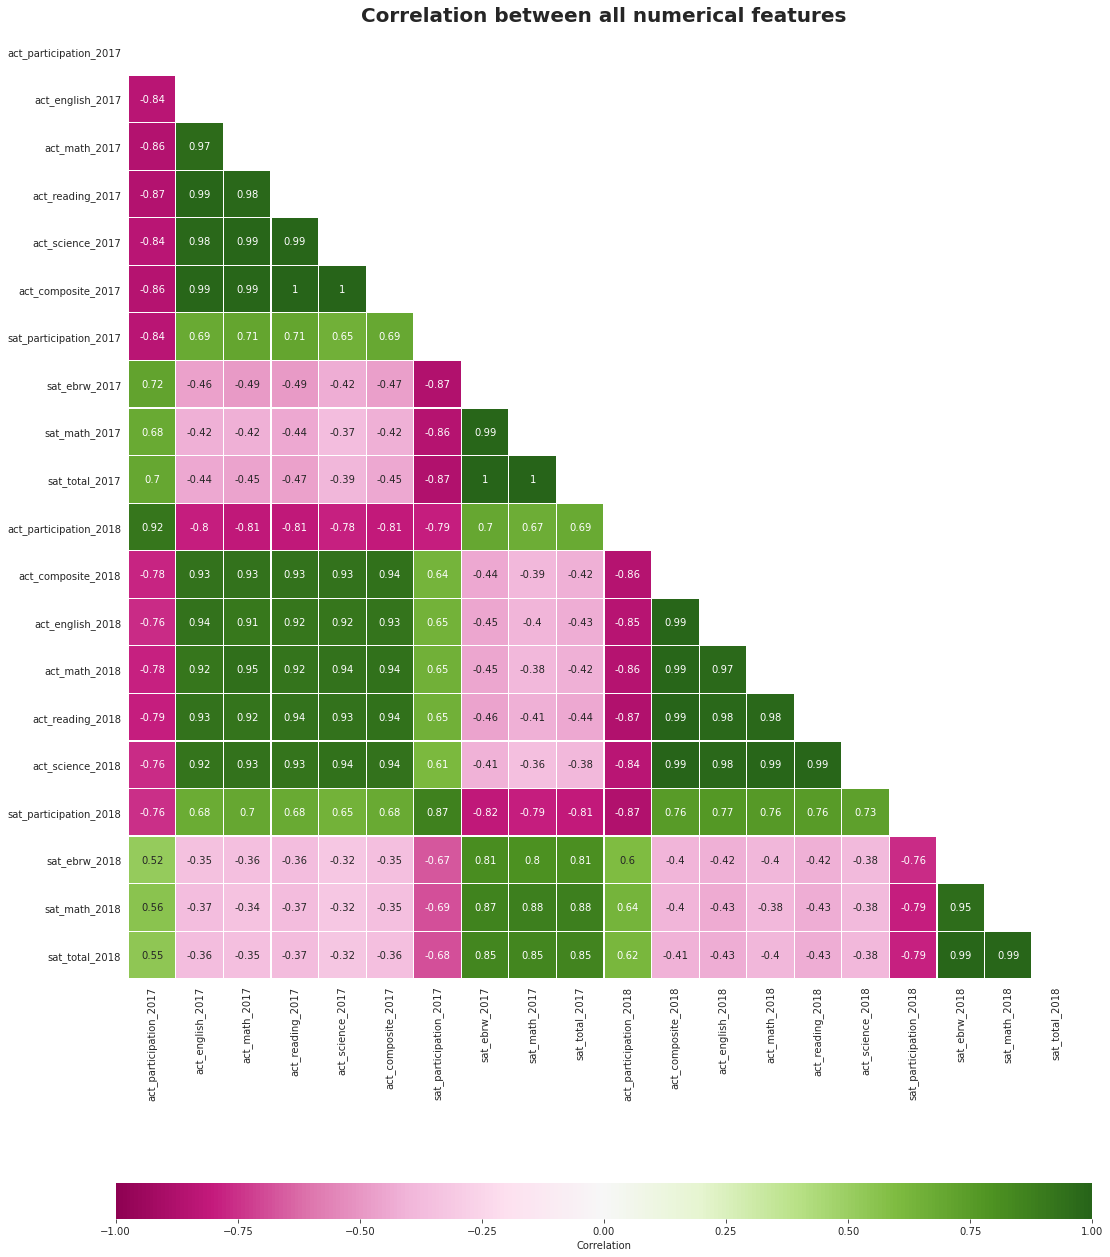

In [68]:
plt.figure(figsize=(50,25))

corr_matrix = final.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

with sb.axes_style("white"):
    sb.heatmap(corr_matrix, 
               cmap="PiYG",
               linewidths=0.2, 
               vmin= -1, 
               vmax=1, 
               mask=mask, 
               square=True, 
               annot=True, 
               annot_kws={"size":10}, 
               cbar_kws={"orientation": "horizontal", "label": "Correlation", "shrink": 0.35, "aspect": 27})

plt.title("Correlation between all numerical features", fontsize=20, fontweight="bold")
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [69]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, main_title):
    sb.set_style("white")
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows*6), sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column], color="cornflowerblue") 
        ax[i].axvline(np.mean(dataframe[column]), color="mediumvioletred",  linewidth=2, label="Mean") # mean line
        ax[i].axvline(np.median(dataframe[column]), color="teal", linestyle="dashed", linewidth=2, label="Median") # median line
        ax[i].legend()
        
    # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=15)
    
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set_xlabel(xlabel)
    
    plt.suptitle(main_title, fontsize=20, fontweight="bold")
    fig.tight_layout(pad=2)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

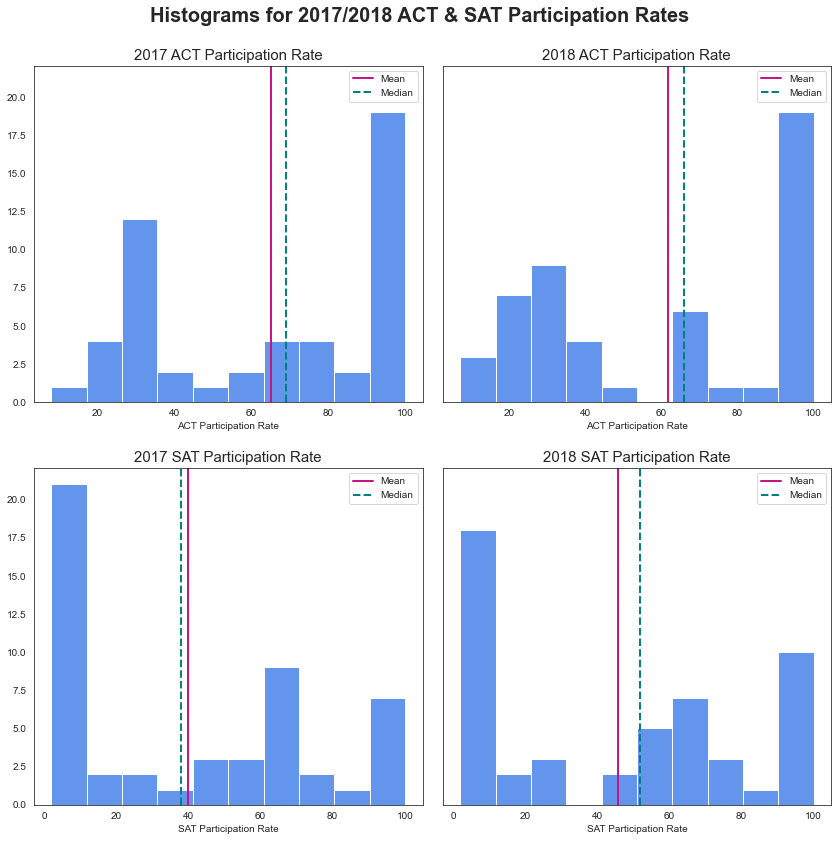

In [70]:
subplot_histograms(final, 
                   ["act_participation_2017", "act_participation_2018", "sat_participation_2017", "sat_participation_2018"], 
                   ["2017 ACT Participation Rate", "2018 ACT Participation Rate", "2017 SAT Participation Rate", "2018 SAT Participation Rate"], 
                   ["ACT Participation Rate", "ACT Participation Rate", "SAT Participation Rate", "SAT Participation Rate"],
                   "Histograms for 2017/2018 ACT & SAT Participation Rates")

2017 and 2018 participation rates for both ACT and SAT tests seem to have bimodal distributions. Their highest peak is either in the 90-100% range or 0-10% range. Very few states lie in the 40-60% range. In 2017 and 2018, 90-100% range has the highest frequency for ACT test while 0-10% range has the highest frequency for SAT test.

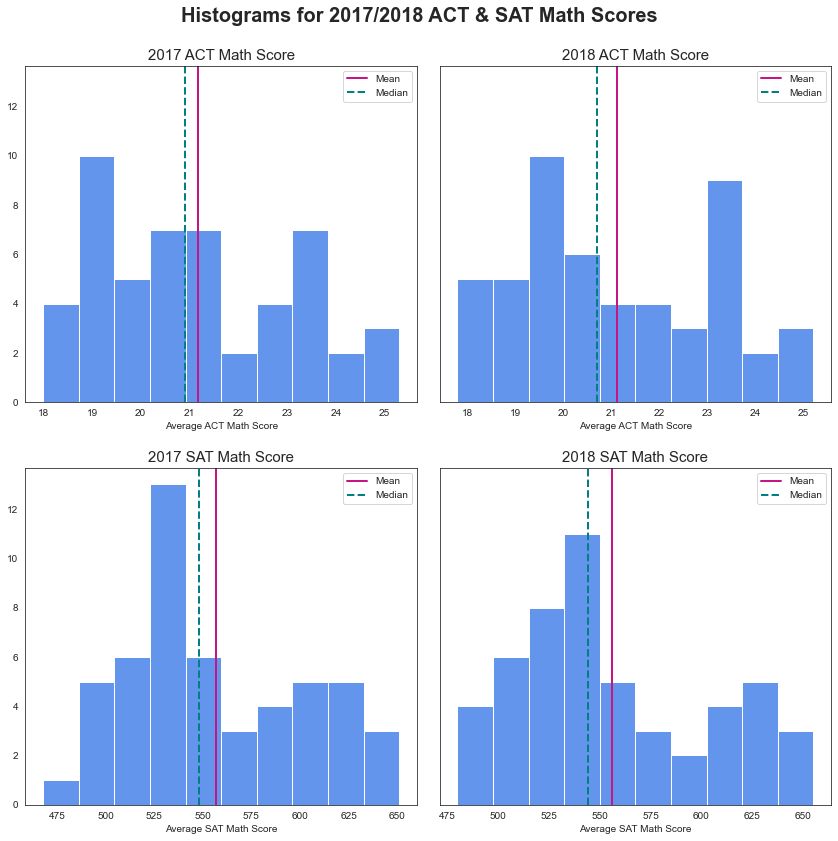

In [71]:
subplot_histograms(final, 
                   ["act_math_2017", "act_math_2018", "sat_math_2017", "sat_math_2018"], 
                   ["2017 ACT Math Score", "2018 ACT Math Score", "2017 SAT Math Score", "2018 SAT Math Score"], 
                   ["Average ACT Math Score", "Average ACT Math Score", "Average SAT Math Score", "Average SAT Math Score"], 
                   "Histograms for 2017/2018 ACT & SAT Math Scores")

Average ACT Math score in 2017 and 2018 have a bimodal distribution. For 2017, average ACT Math score's highest frequency lies in the 18.5-19.5 range. For 2018, average ACT Math's score's highest frequency lies in the 19-20 range.

Average SAT Math score in 2017 and 2018 also have bimodal distribution. For both these distributions, their highest peak lies in the 525-540 range.

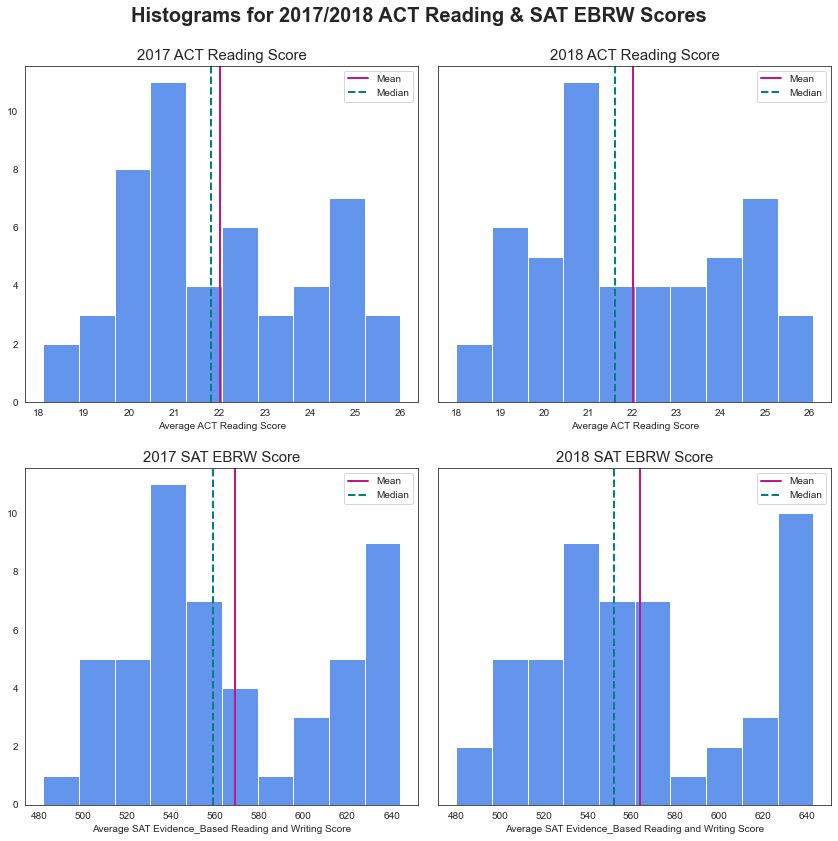

In [72]:
subplot_histograms(final, 
                   ["act_reading_2017", "act_reading_2018", "sat_ebrw_2017", "sat_ebrw_2018"], 
                   ["2017 ACT Reading Score", "2018 ACT Reading Score", "2017 SAT EBRW Score", "2018 SAT EBRW Score"], 
                   ["Average ACT Reading Score", "Average ACT Reading Score", "Average SAT Evidence_Based Reading and Writing Score", "Average SAT Evidence_Based Reading and Writing Score"],
                   "Histograms for 2017/2018 ACT Reading & SAT EBRW Scores")

Average ACT Reading score in 2017 and 2018 have a bimodal distribution. For both these distributions, the highest frequency lies in the 20.5-21.5 range. Both have distributions that are skewed to the right.

Average SAT Evidence_Based Reading and Writing Score score in 2017 and 2018 also have a bimodal distribution. Their highest frequency lies in either the 530-540 range or 630-640 range.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [73]:
def subplot_regscatter(dataframe, list_of_pair_columns, list_of_pair_labels, list_of_subtitles, main_title):
    sb.set_style("white")
    nrows = int(np.ceil(len(list_of_pair_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows*6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, columns in enumerate(list_of_pair_columns): # Gives us an index value to get into all our lists
        sb.regplot(x=columns[0], y=columns[1], data=dataframe, ax=ax[i], ci=None, color="palevioletred", line_kws={"color": "midnightblue"}, scatter_kws={"s":100}) 
        ax[i].set_xlabel(list_of_pair_labels[i][0], fontsize=12)
        ax[i].set_ylabel(list_of_pair_labels[i][1], fontsize=12)
        ax[i].set_title(list_of_subtitles[i], fontsize=15)
    
    if len(list_of_pair_columns) % 2 != 0:
        plt.delaxes(ax=ax[len(list_of_pair_columns)])
    
    plt.suptitle(main_title, fontsize=20, fontweight="bold" )
    fig.tight_layout(pad=2)
    
    return fig, ax

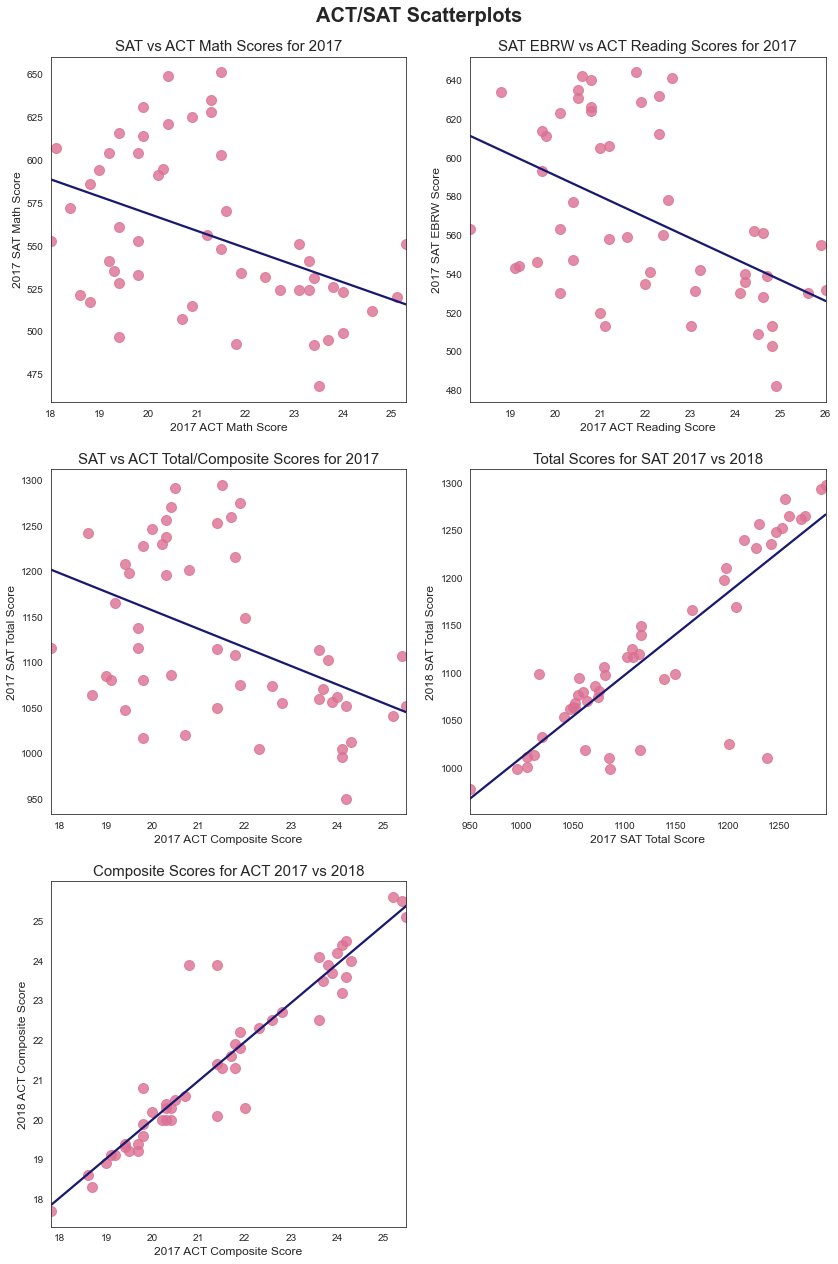

In [74]:
list_of_pair_columns =  [("act_math_2017", "sat_math_2017"), 
                         ("act_reading_2017", "sat_ebrw_2017"),
                         ("act_composite_2017", "sat_total_2017"), 
                         ("sat_total_2017", "sat_total_2018"), 
                         ("act_composite_2017", "act_composite_2018")] 

list_of_pair_labels = [("2017 ACT Math Score", "2017 SAT Math Score"), 
                       ("2017 ACT Reading Score", "2017 SAT EBRW Score"),
                       ("2017 ACT Composite Score", "2017 SAT Total Score"), 
                       ("2017 SAT Total Score", "2018 SAT Total Score"), 
                       ("2017 ACT Composite Score", "2018 ACT Composite Score")]

list_of_subtitles = ["SAT vs ACT Math Scores for 2017", 
                     "SAT EBRW vs ACT Reading Scores for 2017",
                     "SAT vs ACT Total/Composite Scores for 2017",
                     "Total Scores for SAT 2017 vs 2018",
                     "Composite Scores for ACT 2017 vs 2018"]

main_title = "ACT/SAT Scatterplots"

subplot_regscatter(final, list_of_pair_columns, list_of_pair_labels, list_of_subtitles, main_title)
plt.show()

ACT and SAT Math scores in 2017 have a negative relationship. SAT Evidenced-Based Reading and Writing and ACT Reading scores in 2017 have a negative relationship. ACT composite and SAT total scores also have a negative relationship. Based on the heatmap above, the correlation coefficient value between the average score of a ACT test and the average score of its "equivalent" SAT test lies in the (-0.4, -0.5) range. This indicates that there is a moderate negative relationship between ACT and SAT test scores, implying that states that perform well for SAT test may not perform as well for ACT test. 

SAT total scores for 2017 and 2018 have a strong positive relationship. Its correlation coefficient based on the heatmap above is 0.85. This indicates that states that perform well in 2017 will also likely to perform well in 2018.

ACT composite scores for 2017 and 2018 also have a very strong positive relationship. Its correlation coefficient based on the heatmap above is 0.94. This indicates that states with high average SAT total score in 2017, will likely also have high average SAT total score in 2018. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

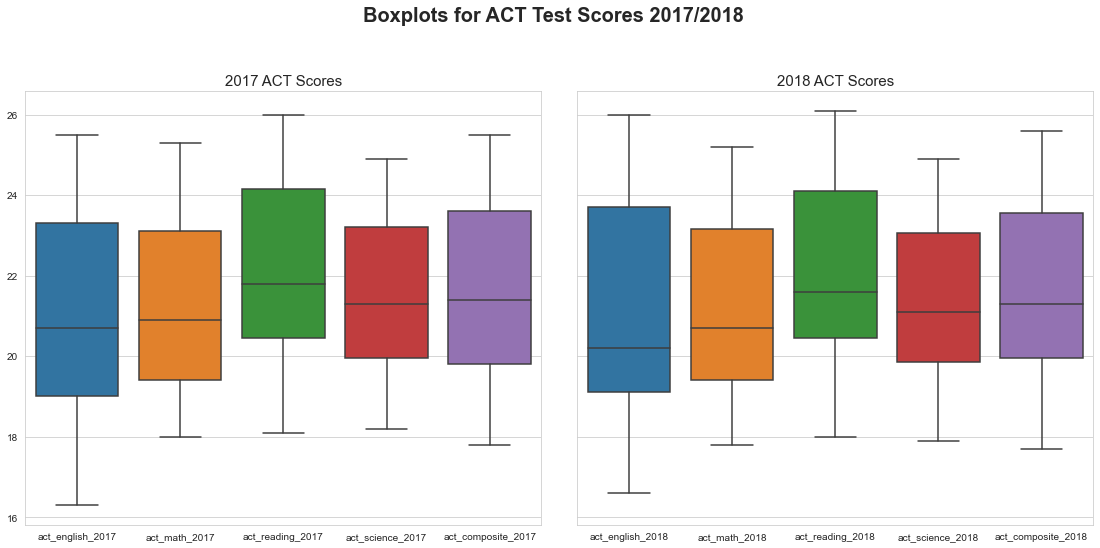

In [75]:
# boxplots for ACT test scores

sb.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True, gridspec_kw={"width_ratios": [1, 1]})
ax = ax.ravel()

ax[0] = sb.boxplot(data=final[["act_english_2017", 
                         "act_math_2017", 
                         "act_reading_2017", 
                         "act_science_2017", 
                         "act_composite_2017"]], 
                   ax=ax[0], 
                   orient="v")
ax[0].set_title("2017 ACT Scores", fontsize=15)

ax[1] = sb.boxplot(data=final[["act_english_2018", 
                         "act_math_2018", 
                         "act_reading_2018", 
                         "act_science_2018", 
                         "act_composite_2018"]], 
                   ax=ax[1], 
                   orient="v")
ax[1].set_title("2018 ACT Scores", fontsize=15)

plt.suptitle("Boxplots for ACT Test Scores 2017/2018", fontsize=20, fontweight="bold")

fig.tight_layout(pad=3)

plt.show()

The range of the average ACT English scores for both 2017 and 2018 are wider compared to the other ACT tests. Its interquartile range is also larger compared to the other ACT tests. This is consistent with its standard deviation, which is the highest out of all the ACT tests. For both years, the minimum average score for ACT English is the lowest. 

For both 2017 and 2018, ACT Science has the smallest range of average scores compared to the other ACT tests. Its interquartile range is smaller compared to the other ACT tests. This is consistent with its standard deviation, which is the lowest out of all the ACT tests.

For both 2017 and 2018, ACT Reading has the highest median score out of all the ACT tests.

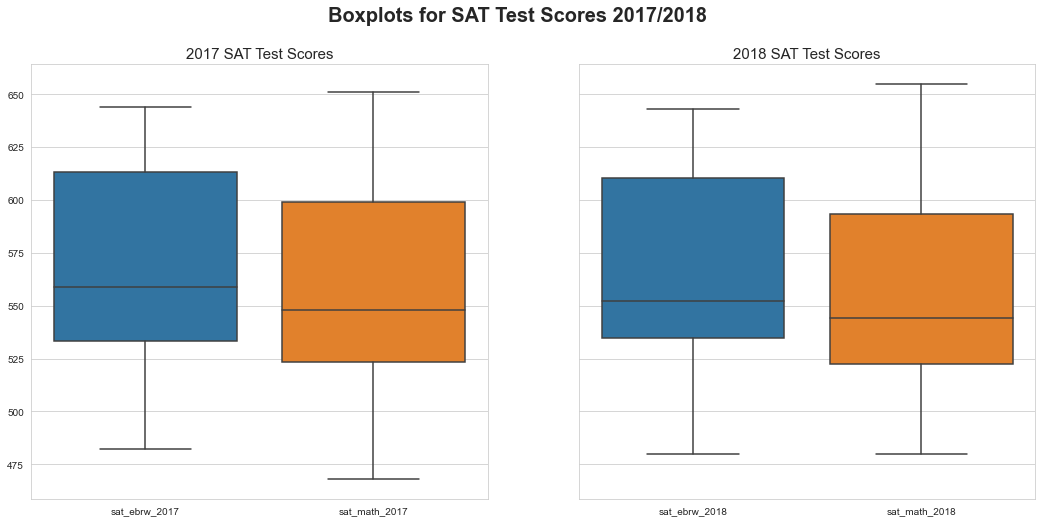

In [76]:
# boxplots for SAT test scores

sb.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
ax = ax.ravel()

ax[0] = sb.boxplot(data=final[["sat_ebrw_2017", "sat_math_2017"]], ax=ax[0], orient="v")
ax[0].set_title("2017 SAT Test Scores", fontsize=15)

ax[1] = sb.boxplot(data=final[["sat_ebrw_2018", "sat_math_2018"]], ax=ax[1], orient="v")
ax[1].set_title("2018 SAT Test Scores", fontsize=15)

plt.suptitle("Boxplots for SAT Test Scores 2017/2018", fontsize="20", fontweight="bold")
plt.show()

Average SAT Math score has a wider range and the higher maximum value compared to average SAT English-Based Reading and Writing test score. On the other hand, average SAT EBRW score has the higher median out of the two. 

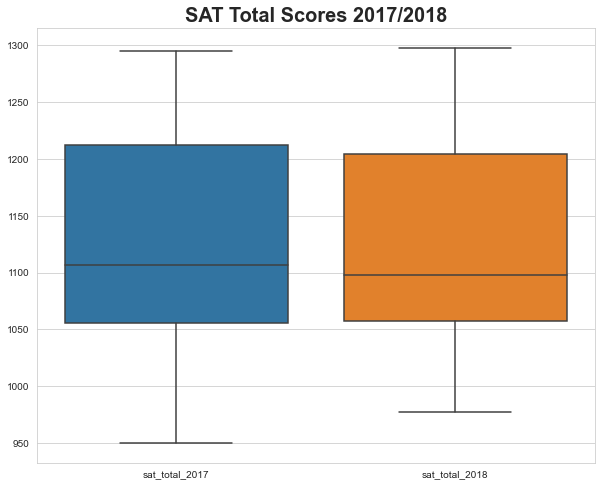

In [77]:
# boxplots for SAT total scores

sb.set_style("whitegrid")
plt.figure(figsize=(10, 8))


sb.boxplot(data=final[["sat_total_2017", "sat_total_2018"]], orient="v")
plt.title("SAT Total Scores 2017/2018", fontsize=20, fontweight="bold")

plt.show()

The average total SAT score in 2017 has a wider range than that of 2018. Its interquartile range is slightly larger than that of 2018. This is consistent with its standard deviation, which is higher out of the two. The minimum score in 2018 is higher than that in 2017.

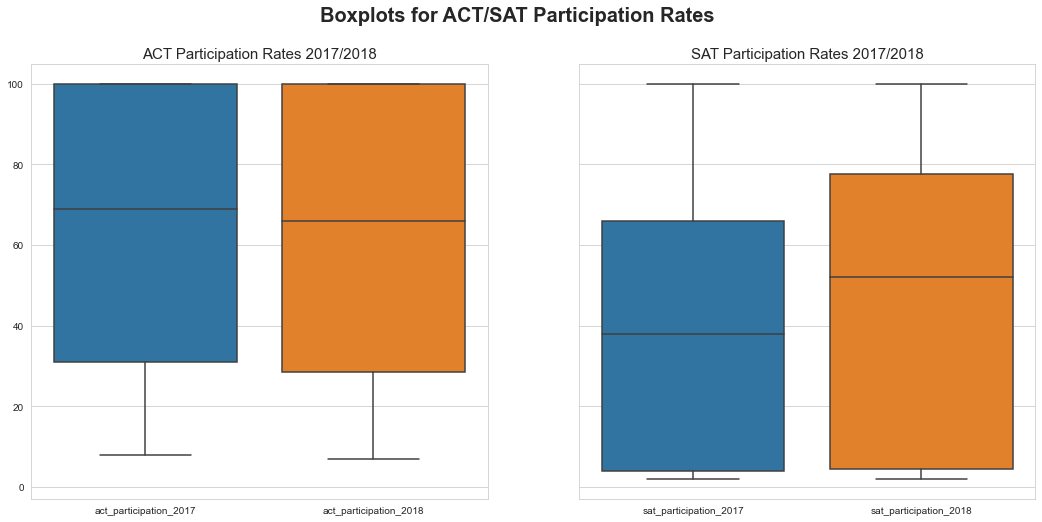

In [78]:
# participation rates

sb.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
ax = ax.ravel()

ax[0] = sb.boxplot(data=final[["act_participation_2017", "act_participation_2018"]], ax=ax[0], orient="v")
ax[0].set_title("ACT Participation Rates 2017/2018", fontsize=15)

ax[1] = sb.boxplot(data=final[["sat_participation_2017", "sat_participation_2018"]], ax=ax[1], orient="v")
ax[1].set_title("SAT Participation Rates 2017/2018", fontsize=15)

plt.suptitle("Boxplots for ACT/SAT Participation Rates", fontsize=20, fontweight="bold")
plt.show()

ACT participation rate in 2018 has a slightly wider interquartile range than in 2017. But the median value for the 2017 rate is higher than the 2018 rate.

SAT participation rate in 2018 has a wider interquartile range than in 2017. This is consistent with its standard deviation, which is higher than that of 2017. The median for SAT participation rate in 2018 is also higher than in 2017. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Test participation rates and test scores

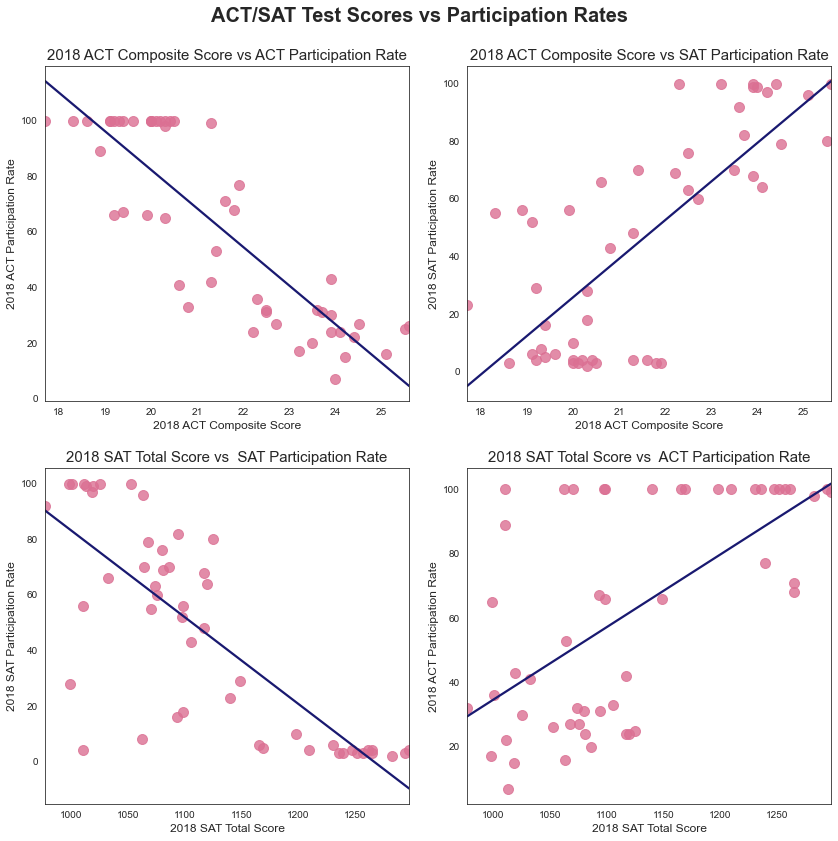

In [79]:
list_of_pair_columns =  [("act_composite_2018", "act_participation_2018"), 
                         ("act_composite_2018", "sat_participation_2018"),
                         ("sat_total_2018", "sat_participation_2018"), 
                         ("sat_total_2018", "act_participation_2018")]  

list_of_pair_labels = [("2018 ACT Composite Score", "2018 ACT Participation Rate"), 
                       ("2018 ACT Composite Score", "2018 SAT Participation Rate"),
                       ("2018 SAT Total Score", "2018 SAT Participation Rate"), 
                       ("2018 SAT Total Score", "2018 ACT Participation Rate")]

list_of_subtitles = ["2018 ACT Composite Score vs ACT Participation Rate", 
                     "2018 ACT Composite Score vs SAT Participation Rate",
                     "2018 SAT Total Score vs  SAT Participation Rate",
                     "2018 SAT Total Score vs  ACT Participation Rate"]

main_title = "ACT/SAT Test Scores vs Participation Rates"

subplot_regscatter(final, list_of_pair_columns, list_of_pair_labels, list_of_subtitles, main_title)
plt.show()

Based on the heatmap and the scatterplot results above, there is a strong relationship between test results and the states participation rates. 

ACT tests scores have a strong negative relationship with the ACT participation rate. Similarly with SAT test scores with SAT participation rate. States with low ACT(SAT) participation are high scorers for ACT(SAT).  

ACT test scores have a strong positive relationship with SAT participation rate. Similarly with SAT test scores with ACT participation rate. States with high participation for ACT are high scorers for SAT. 

## Test participation rates with state-level population and median income

In this section, we look at the relationship between test participation rates and state-level population and income.

State-level income and population data is taken from external sources:

1) <a href="https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html">Population Data</a>

2) <a href="https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income">Income Data</a>

In [80]:
# population dataset
population = pd.read_csv("../data/nst-est2019-01.csv")

# income dataset
income = pd.read_csv("../data/State-Level Median Income 2017.csv")

# add income and population data to final_add
final_add = pd.merge(final_add, income, on="state", how="left")
final_add = pd.merge(final_add, population, on="state", how="left")
final_add.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_ebrw_2017,sat_math_2017,...,act_science_2018,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,sat_participation_pct_change,act_participation_pct_change,median_income_2017,population_2017,population_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,19.0,6.0,595,571,1166,1.0,0.0,48123,4874486,4887681
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,20.7,43.0,562,544,1106,5.0,-32.0,73181,739700,735139
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,19.2,29.0,577,572,1149,-1.0,4.0,56581,7044008,7158024
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,19.4,5.0,592,576,1169,2.0,0.0,45869,3001345,3009733
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,22.1,60.0,540,536,1076,7.0,-4.0,71805,39358497,39461588


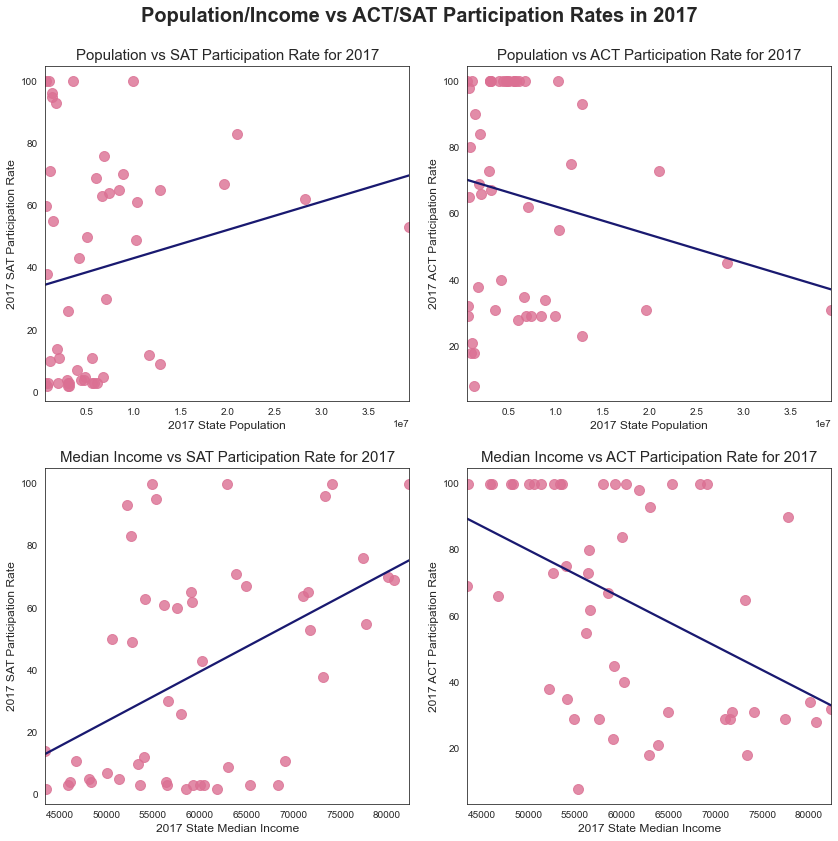

In [81]:
list_of_pair_columns =  [("population_2017", "sat_participation_2017"), 
                         ("population_2017", "act_participation_2017"),
                         ("median_income_2017", "sat_participation_2017"), 
                         ("median_income_2017", "act_participation_2017")] 

list_of_pair_labels = [("2017 State Population", "2017 SAT Participation Rate"), 
                       ("2017 State Population", "2017 ACT Participation Rate"),
                       ("2017 State Median Income", "2017 SAT Participation Rate"), 
                       ("2017 State Median Income", "2017 ACT Participation Rate")]

list_of_subtitles = ["Population vs SAT Participation Rate for 2017", 
                     "Population vs ACT Participation Rate for 2017",
                     "Median Income vs SAT Participation Rate for 2017",
                     "Median Income vs ACT Participation Rate for 2017"]

main_title = "Population/Income vs ACT/SAT Participation Rates in 2017"

subplot_regscatter(final_add, list_of_pair_columns, list_of_pair_labels, list_of_subtitles, main_title)
plt.show()

Based on the scatterplots above, there is a positive relationship between SAT participation rate with state income and population. However, the reverse is seen for ACT participation rate. 

## Test participation rates and state policies

In this section, we look at the relationship between participation rates and state policies. The state policies here refer to the test requirement for each state and whether any test subsidies are provided by the state. 

State policies information for each state is gathered from these external sources: 

1) <a href="https://blog.prepscholar.com/which-states-require-the-sat">Prepscholar</a>

2) <a href="https://magoosh.com/hs/sat/free-sat-tests-by-state/">Magoosh - Free SAT</a>

3) <a href="https://magoosh.com/hs/sat/states-that-require-the-act-or-sat/">Magoosh - ACT or SAT</a>

4) <a href="https://magoosh.com/hs/act/free-act-tests-by-state/">Magoosh - Free ACT</a>

5) <a href="https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/">Collegeraptor - Free ACT/SAT</a>

In [82]:
# create several lists 
# require_sat contains states that have made SAT test mandatory
# require_act contains states that have made SAT test mandatory
# require_act_or_sat contain states that have the test mandatory but give the option to choose either SAT or ACT
# free_sat contains states that provide the SAT test for free
# free_act contains states that provide the ACT test for free

require_sat = ["Colorado", "Connecticut", "Delaware", "District of Columbia", "Illinois", 
               "Maine", "Michigan", "New Hampshire", "Rhode Island", "West Virginia"]

require_act = ["Alabama", "Arkansas", "Hawaii", "Kentucky", "Louisiana", 
               "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
               "North Dakota", "North Carolina", "South Carolina", "Utah", "Wisconsin", 
               "Wyoming"]

require_act_or_sat = ["Idaho", "Ohio", "Tennessee", "Oklahoma"]

free_sat = ["Michigan", "Connecticut", "New York", "Delaware", "Idaho", 
            "New Hampshire", "Illinois", "Colorado", "District of Columbia", "Maine", 
            "Rhode Island"]

free_act = ["Arkansas", "Louisiana", "North Carolina", "Alabama", "Wyoming",
            "Colorado", "Montana", "Utah", "Kentucky", "Nevada",
            "Wisconsin", "Missouri", "South Carolina", "Oklahoma", "Hawaii",
            "Mississippi"]

In [83]:
# add the column state_subsidies to the final_add dataframe
# states with SAT subsisides will have "SAT" as the value
# states with ACT subsidies will have "ACT" as the value
# states that provide no test subsisides will have "no subsidies" as the value

state_subsidies = []

for i, v in enumerate(final_add["state"]):
    if v in free_sat:
        state_subsidies.append("SAT")
    
    elif v in free_act:
        state_subsidies.append("ACT")
    
    else:
        state_subsidies.append("no subsidies")

final_add["state_subsidies"] = state_subsidies

In [84]:
# add the column state_requirement to the final_add dataframe
# states with mandatory SAT rule will have "SAT" as the value
# states with mandatory ACT rule will have "ACT" as the value
# states with mandatory test rule but give the option of either SAT or ACT will have "ACT or SAT" as the value
# states with no mandatory rule around the tests will have "no requirement" as the value


state_requirement = []

for i, v in enumerate(final_add["state"]):
    if v in require_sat:
        state_requirement.append("SAT")
    
    elif v in require_act:
        state_requirement.append("ACT")
    
    elif v in require_act_or_sat:
        state_requirement.append("ACT or SAT")
    
    else:
        state_requirement.append("no requirement")
        
final_add["state_requirement"] = state_requirement

In [85]:
# save new dataframe to csv

final_add.to_csv("../data/final_add.csv", index=False)

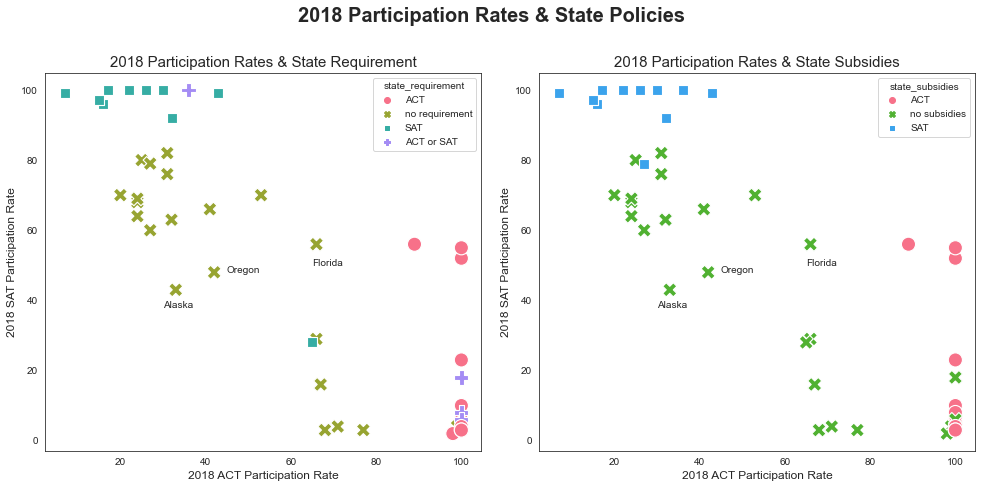

In [86]:
sb.set_style("white")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7)) # You'll want to specify your figsize

sb.scatterplot(data=final_add, 
               x="act_participation_2018", 
               y="sat_participation_2018", 
               hue="state_requirement",
               style="state_requirement",  
               palette="husl",
               s=200, 
               ax=ax[0]) 
ax[0].set_xlabel("2018 ACT Participation Rate", fontsize=12)
ax[0].set_ylabel("2018 SAT Participation Rate", fontsize=12)
ax[0].set_title("2018 Participation Rates & State Requirement", fontsize=15)
ax[0].annotate("Alaska", (30,38))
ax[0].annotate("Oregon", (45,48))
ax[0].annotate("Florida", (65,50))

sb.scatterplot(data=final_add, 
               x="act_participation_2018", 
               y="sat_participation_2018", 
               hue="state_subsidies",
               style="state_subsidies",  
               palette="husl", 
               s=200, 
               ax=ax[1]) 
ax[1].set_xlabel("2018 ACT Participation Rate", fontsize=12)
ax[1].set_ylabel("2018 SAT Participation Rate", fontsize=12)
ax[1].set_title("2018 Participation Rates & State Subsidies", fontsize=15)
ax[1].annotate("Alaska", (30,38))
ax[1].annotate("Oregon", (45,48))
ax[1].annotate("Florida", (65,50))

plt.suptitle("2018 Participation Rates & State Policies", fontsize=20, fontweight="bold" )
fig.tight_layout(pad=2)
    
plt.show()

Based on the scatter plots above, it is obvious that state policies around the tests play an important role in driving the participation rate in each state. 

Most of the states that have full or near full SAT/ACT participation in 2018 have made the test mandatory for students and/or provide test subsidies for test takers. 

19 states have 90-100% ACT participation rate in 2018. 18 out of 19 states have made the test compulsory and/or provide the test to students for free. Only Minnesota with near full ACT participation has no state policy with regards to the test. All these states with high ACT participation rate, have low SAT participation rate.

10 states have 90-100% SAT participation rate in 2018. All of these states have made the test mandatory and provide test subsidies to students. West Virginia is the only state with relatively low SAT participation rate despite state policy. 

Most of the states in the middle of the plot have no state policy with regards to the SAT/ACT tests. These states have neither made either test mandatory nor provide any test subsidies for students in 2018. 

There are 20 states with no mandatory testing or state-funded test. The states with the lowest SAT and ACT participation rates in 2018 are Alaska, Oregon and Florida. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

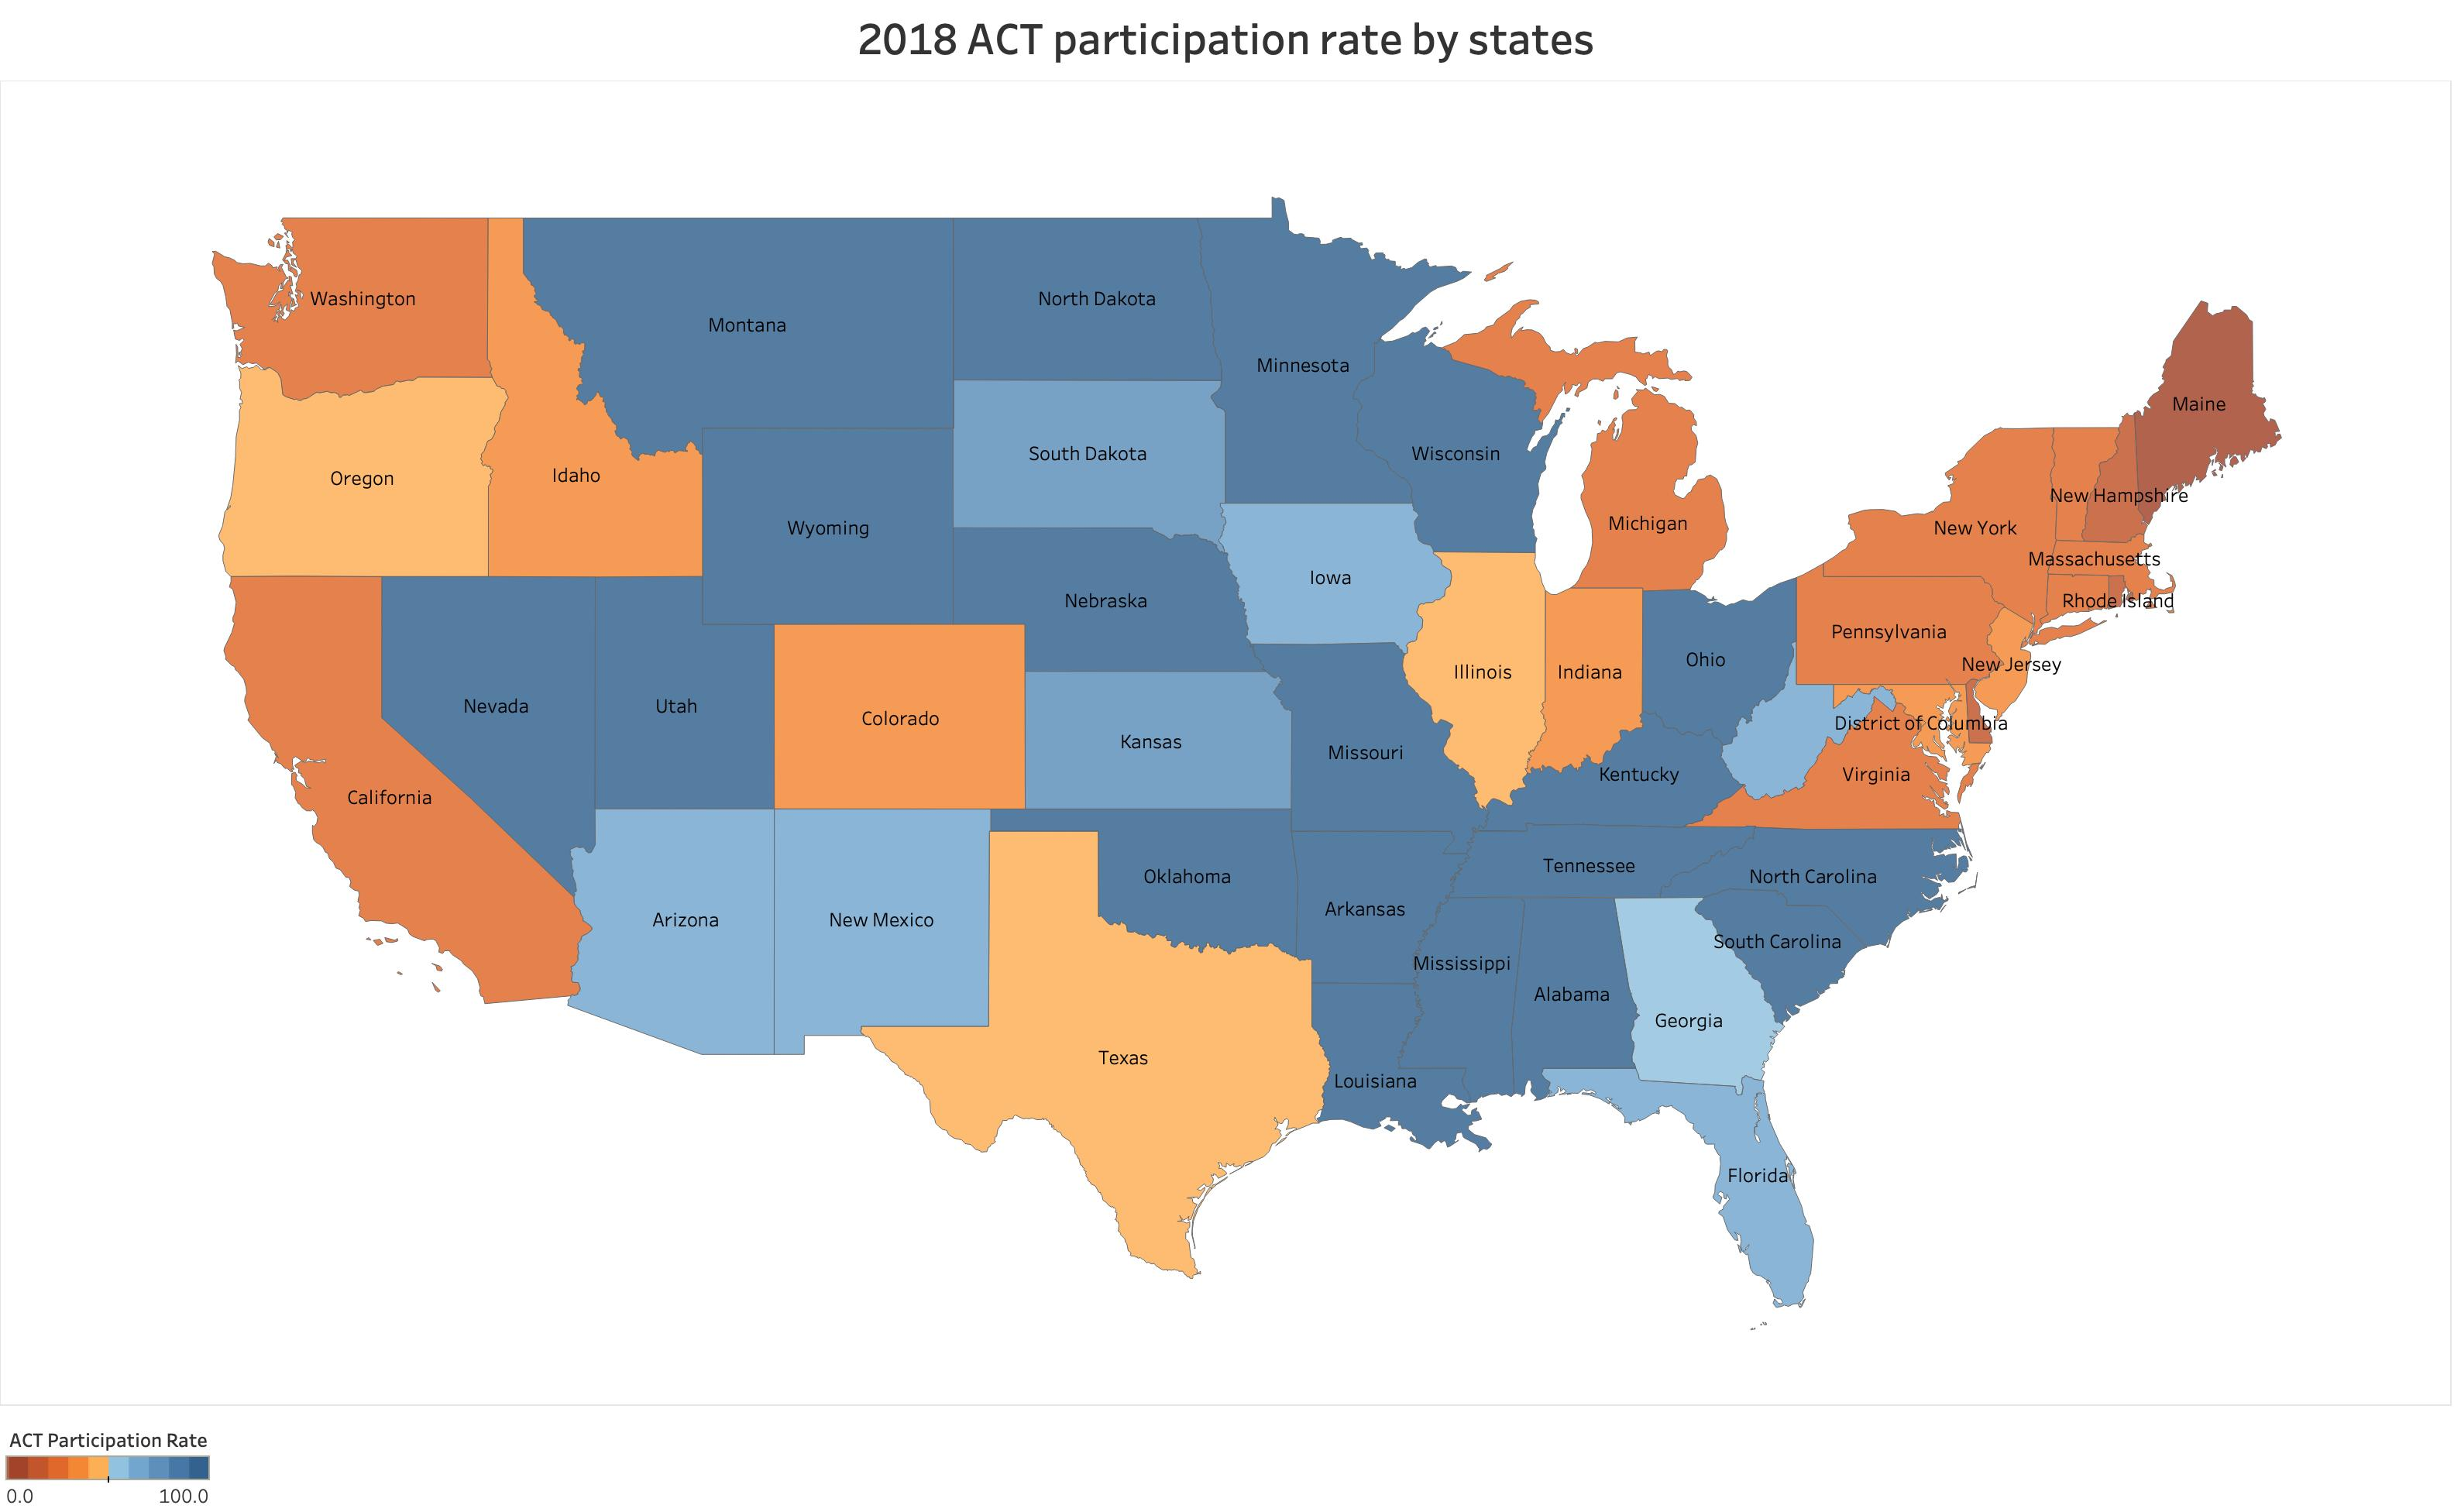

States with ACT participation rate higher than 50% are in blue, with states having full ACT participation or near-full ACT participation (90-100%) in dark blue. 19 states have 90-100% ACT participation in 2018.

States with ACT participation rate lower than 50% are in brown. States with the lowest ACT participation, like Maine (7%) is in dark brown while states like Texas, Oregan and Illinois with ACT participation within 40-50% in light brown. 

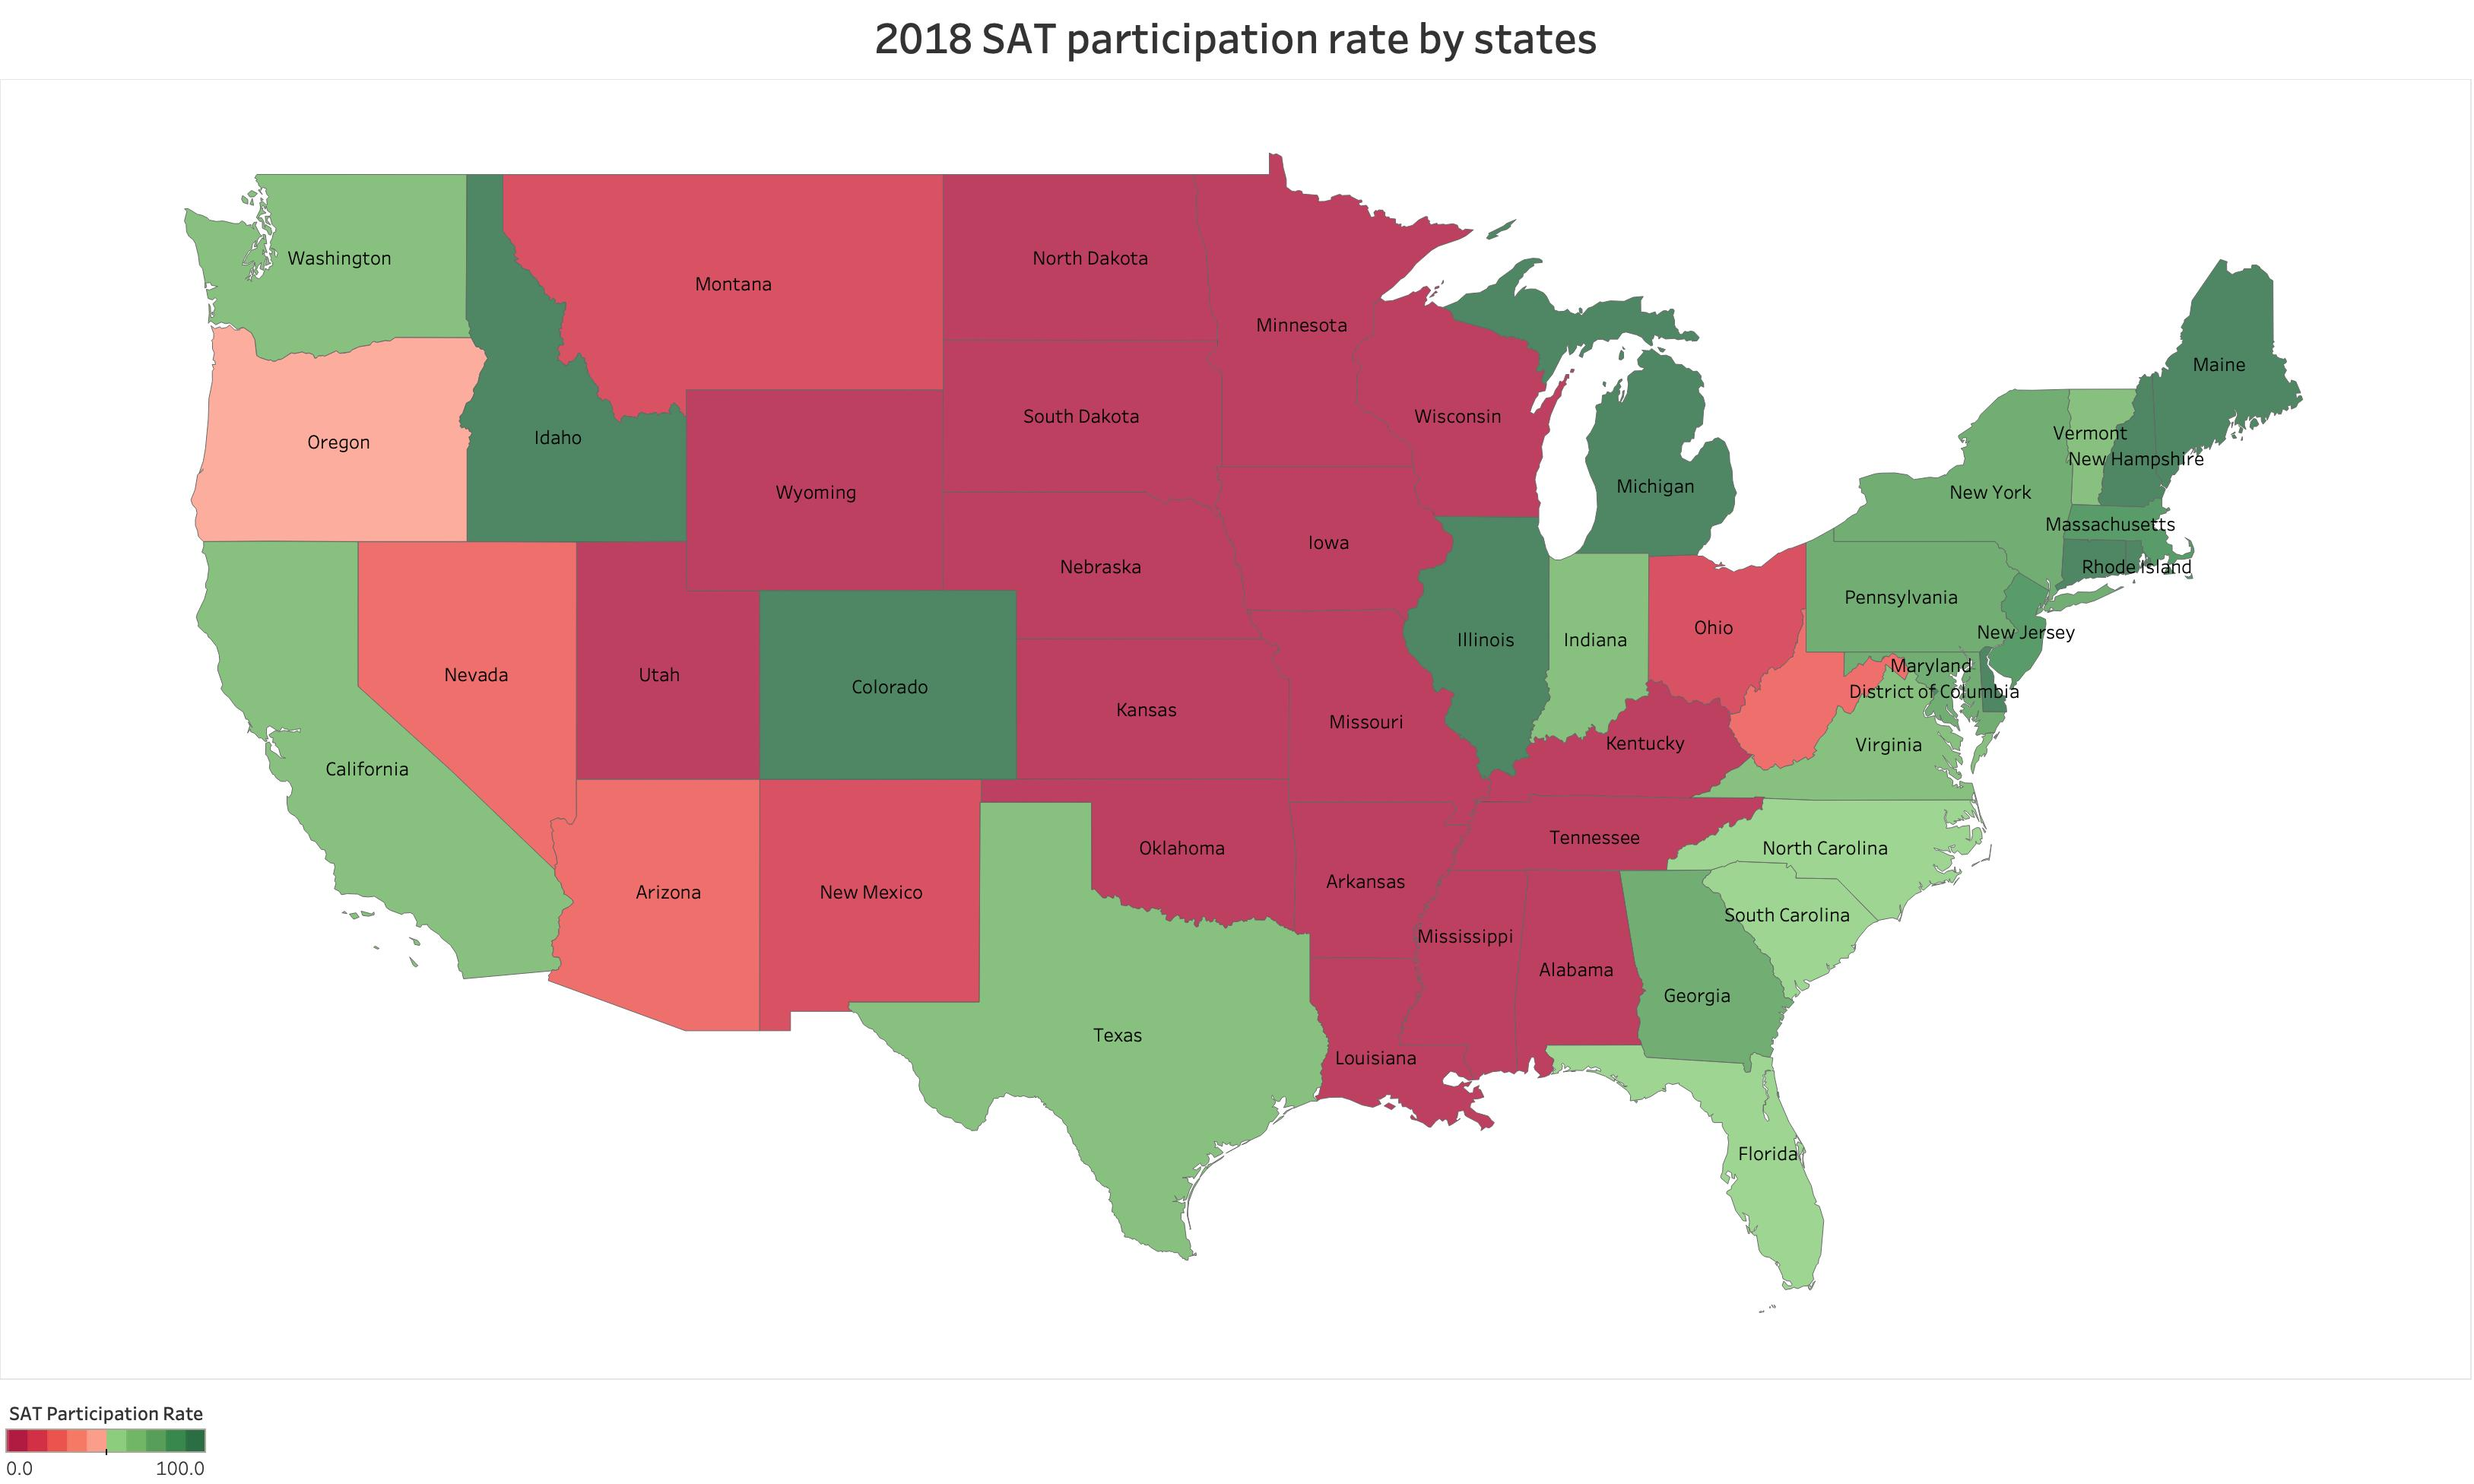

States with SAT participation rate higher than 50% are in green, with states having full SAT participation or near-full SAT participation (90-100%) in dark green. 10 states have 90-100% SAT participation in 2018.

States with SAT participation rate lower than 50% are in red. States with the lowest SAT participation (below 10%) like Nebraska, South Dakota and North Dakota are in dark red. There are 18 states with 0-10% SAT participation in 2018.

Meanwhile, states that are closer to 50%, like Oregan with 48% SAT participation, are in light red.

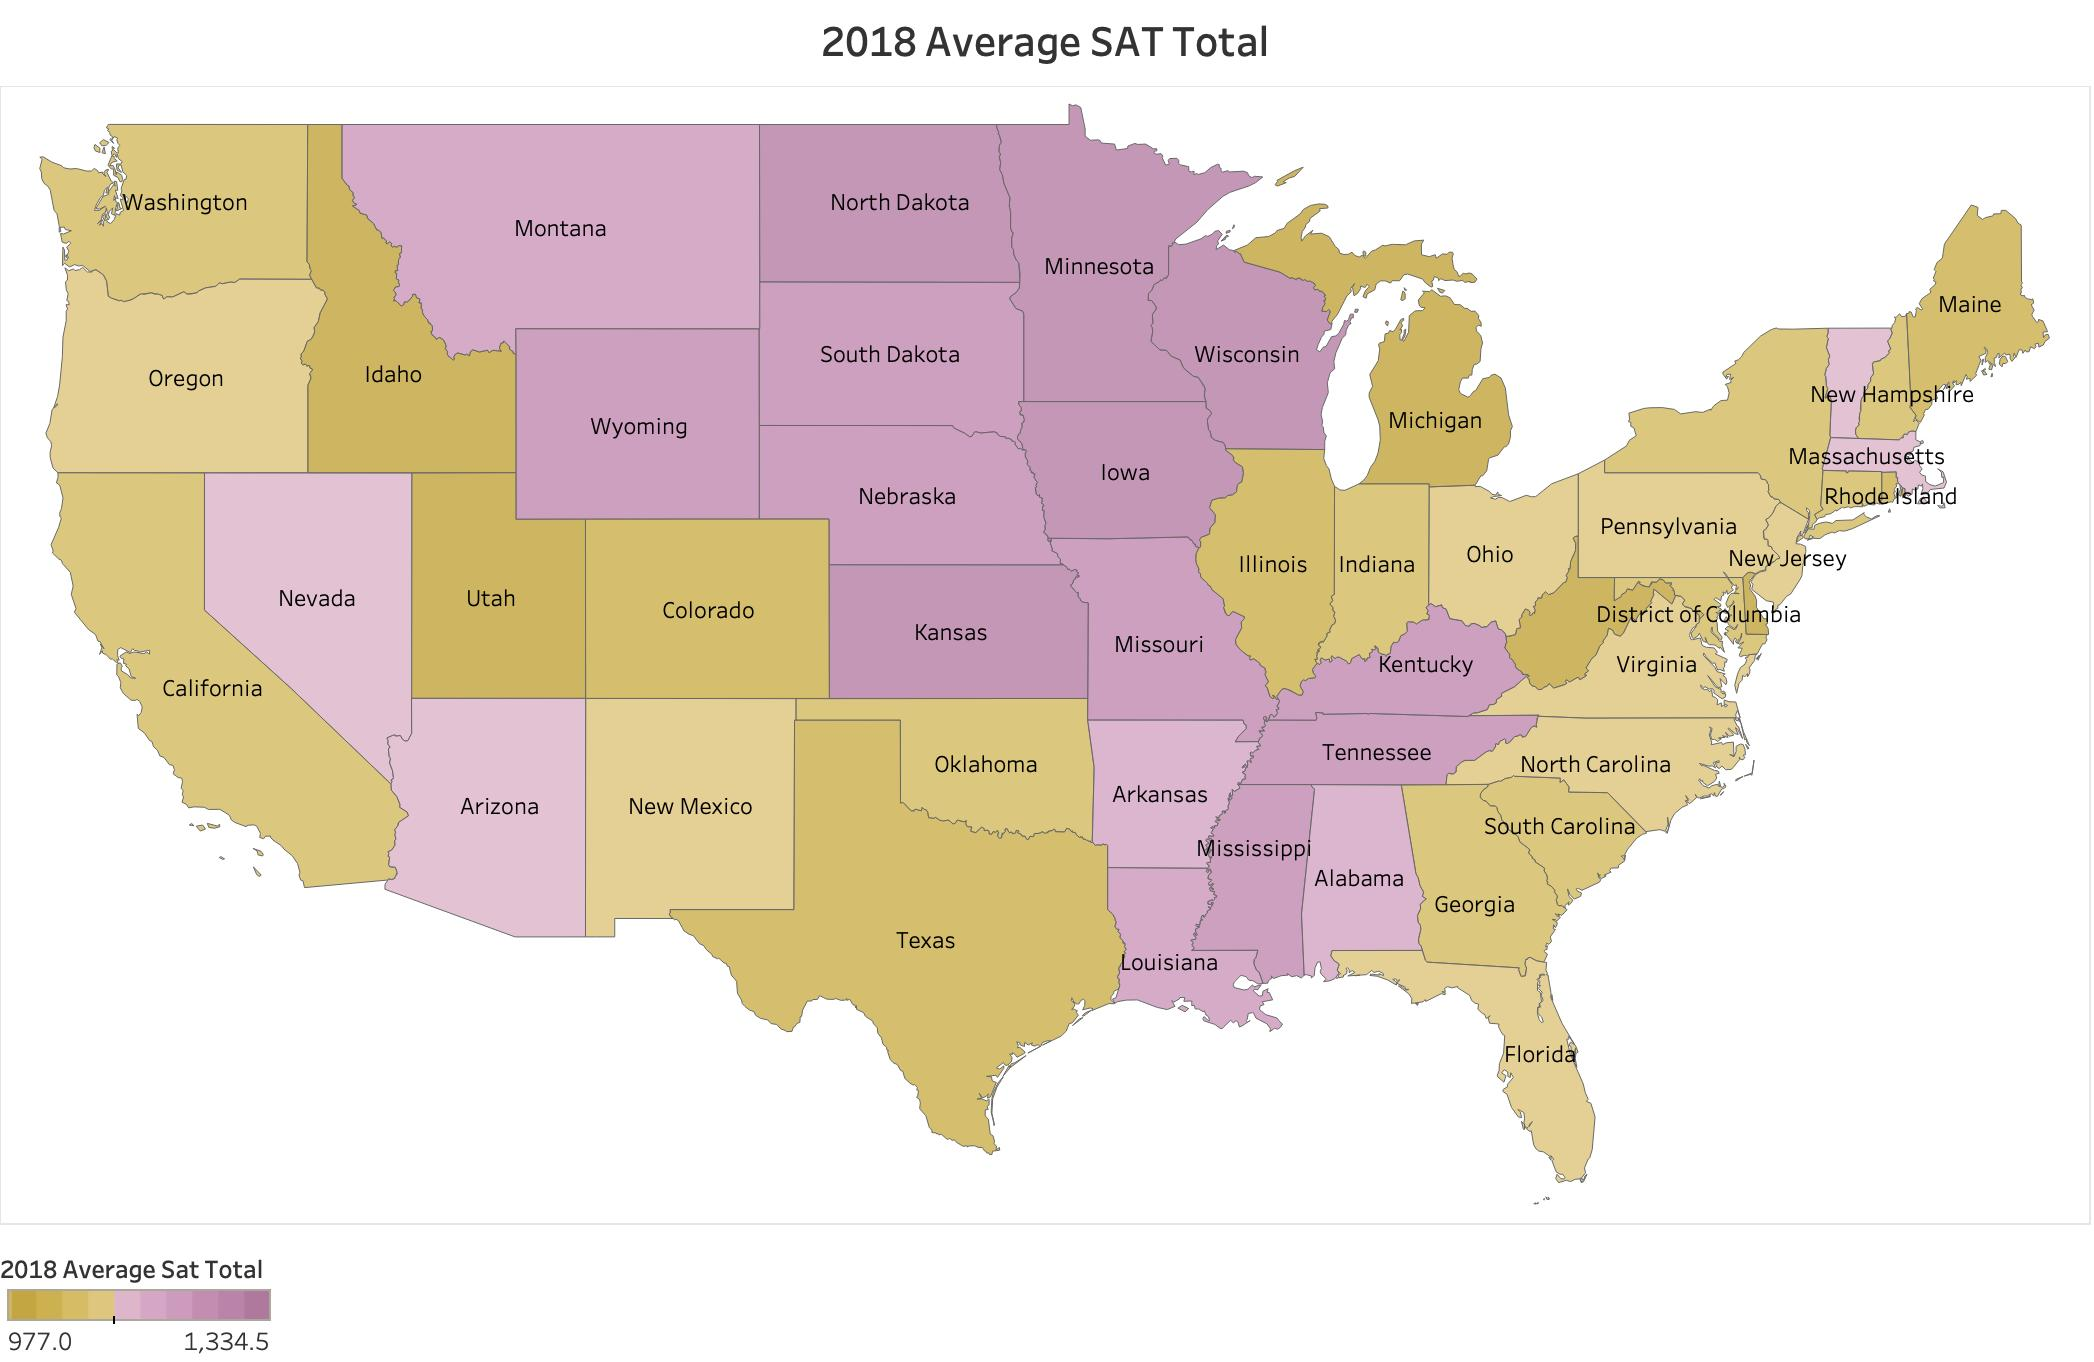

States that are above the mean (1,120.02) are in purple. States with the highest score are in dark purple. These states include Minnesota(1298), with the highest average SAT total in 2018 and Wisconsin(1294).

States that are below the mean are in gold. States with the lowest score are in dark gold. These states include District of Columbia(977), which has the lowest average SAT total in 2018 and Idaho(1001).

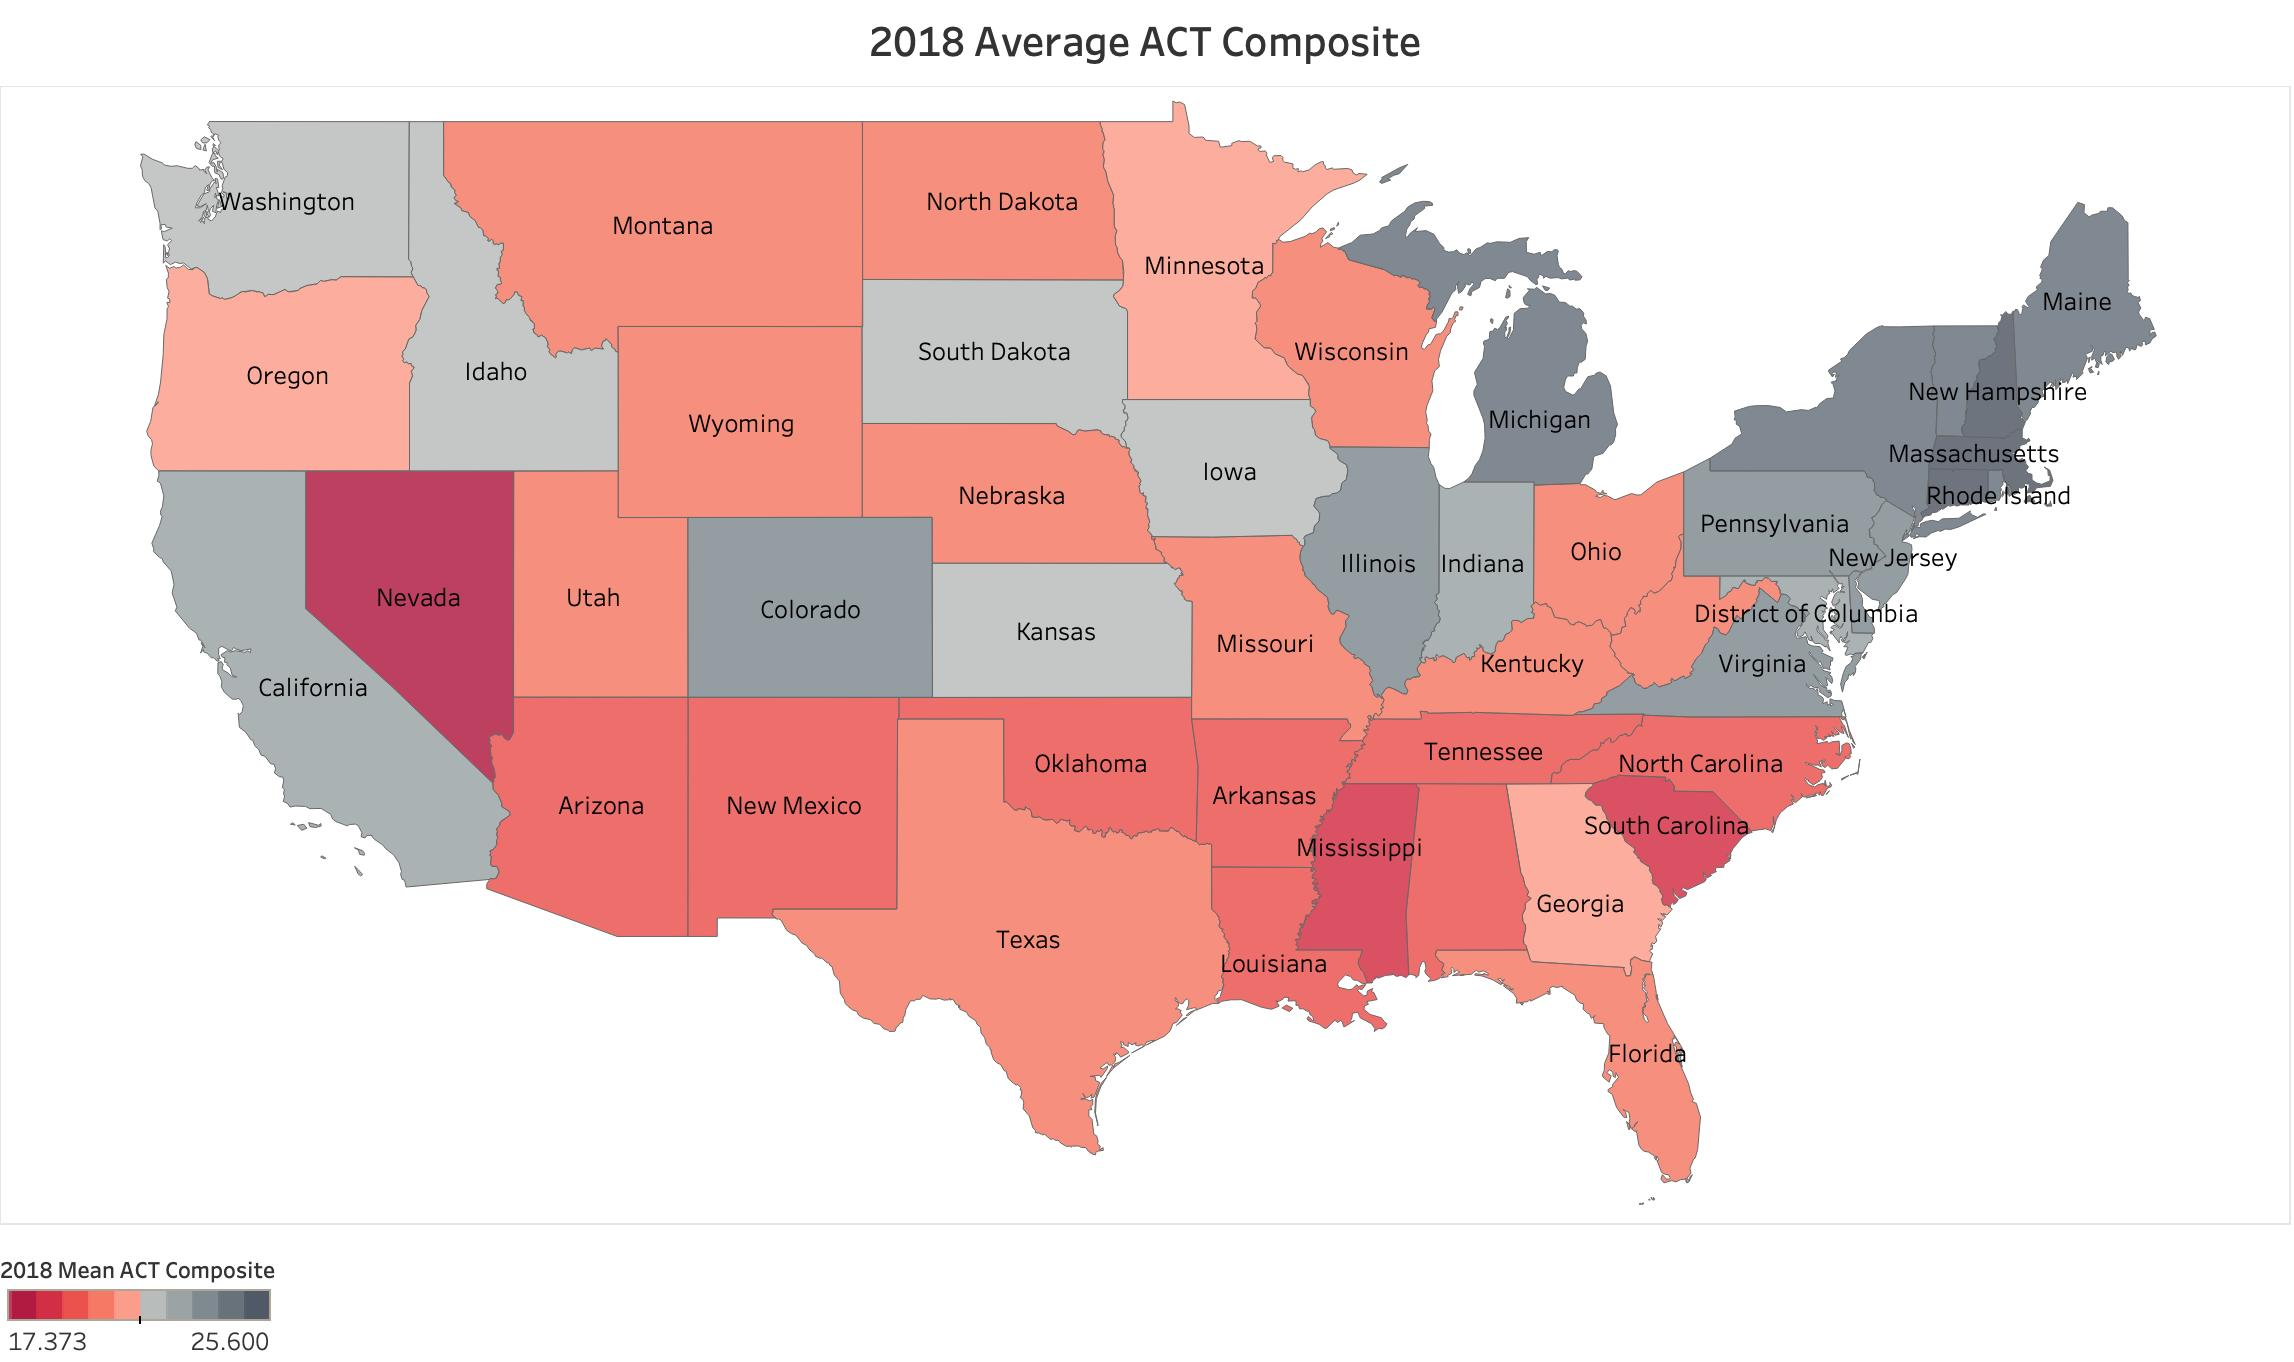

States that are above the mean (21.49) are in grey. States with the highest ACT score are in dark grey. These states include Connecticut(25.6), with the highest mean ACT Composite in 2018 and Massachusetts(25.5).

States that are below the mean are in red. States that have the lowest score are in dark red. These states include Nevada(17.7), which has the lowest mean ACT Composite in 2018 and North Carolina(18.3).

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

### ACT 2017

#### act_participation_2017
ACT participation rate in 2017 ranges from 8.0% to 100.0%. This variable has a bimodal distribution with its modes in the 90-100% range and 25-35% range. 20 states have 90-100% ACT participation rate, whereas 12 states have 25-35% of its students taking ACT in 2017. The mean (65.25) is lower than the median (69.00), which is lower than the highest mode. Thus, indicating that the distribution is skewed to the left. 

#### act_english_2017 
The average ACT score for English in 2017 ranges from 16.30 to 25.50. This variable has a bimodal distribution with its modes in the 18-20 range and 23-25 range. 19 states have an average ACT English score that is 18-20, whereas 11 states have scores that are between 23 and 25. The mean (20.93) is higher than the median (20.70), which is higher than the highest mode. Thus, indicating that the data is positively skewed. 

#### act_math_2017 
The average ACT score for Math in 2017 ranges from 18.00 to 25.30. This variable has a bimodal distribution with its modes in the 18.5-20 range and 23-24.5 range. 16 states have an average Math score that is between 18.5 to 20 while 11 states have scores that are between 23 and 24.5. The mean (21.18) is higher than the median (20.90), and the median is higher than the highest mode. Thus, the distribution is positively skewed.

#### act_reading_2017
The average ACT score for Reading in 2017 ranges from 18.10 to 26.00. This variable has a bimodal distribution with its modes in the 20-21.5 range and 24-25 range. 16 states have an average Reading score that is between 20 and 21.5 while 11 states have an an average score 24.25. The mean (22.01) is higher than the median (21.80) and the median is higher than the highest mode. Thus, the distribution is positively skewed.

#### act_science_2017 
The average score for ACT Science in 2017 ranges from 18.20 to 24.90. This variable has a mode that lies in the 21.5 to 22.5 range. Its mean (21.45) is higher than the median (21.30).

#### act_composite_2017 
The mean composite score for ACT in 2017 ranges from 17.80 to 25.50. This variable has a bimodal distribution with its modes in the 19.5-21 range and 23.5-24.5 range. For this distribution, the mean (21.52) is higher than the median (21.40) and the median is higher than the highest mode. Thus, the distribution is skewed to the right.


### SAT 2017

#### sat_participation_2017 
SAT participation rate in 2017 ranges from 2.0% to 100.0%. This variable has a bimodal distribution with its modes in the 0-10% range and 60-70% range. 19 states have 0-10% SAT participation rate while 10 states have 60-70% ACT participation rate in 2017. The mean (39.80) is higher than the median (38.00), which is higher than the highest mode. Thus, indicating that the distribution is skewed to the right. 

#### sat_ebrw_2017 
The average score for SAT Evidence-Based Reading and Writing in 2017 ranges from 482.00 to 644.00. This variable has a bimodal distribution with its modes lying in the 530-550 range and 620-640 range. For this distribution, the mean (569.12) is higher than the median (559.00) and the median is higher than the highest mode. Hence, this distribution is skewed to the right.

#### sat_math_2017 
The average score for SAT Math in 2017 ranges from 468.00 to 651.00. This variable has a bimodal distribution with its modes in the 510-540 range and 600-630 range. For this distribution, the mean (556.88) is higher than the median (548.00) and the median is higher than the highest mode. Thus, indicating that the distribution is positively skewed.

#### sat_total_2017 
The average total score for SAT in 2017 ranges from 950 to 1295. This variable has a bimodal distribution with its modes in the 1050-1100 range and 1225-1275 range. The mean (1126.10) is higher than the median (1107.00) and the median is higher than the highest mode. Thus, the distribution is positively skewed.

### ACT 2018

#### act_participation_2018
ACT participation rate in 2018 ranges from 7.0% to 100.0%. This variable has a bimodal distribution with its modes in the 90-100% range and 25-35% range. 19 states have 90-100% ACT participation rate while 10 states have 25-35% ACT participation rate in 2018. The mean (61.65) is lower than the median (66.00), which in turn is lower than the highest mode. Thus, indicating that the distribution is skewed to the left. 

#### act_composite_2018 
The mean composite score for ACT in 2018 ranges from 17.70 to 25.60. This variable has a bimodal distribution with its modes in the 19.5-21 range and 23.5-24.5 range. For this distribution, the mean (21.49) is higher than the median (21.30) and the median is higher than the highest mode. Thus, this distribution is positively skewed.

#### act_english_2018 
The average English score for ACT in 2018 ranges from 16.60 to 26.00. This variable has a bimodal distribution with its modes in the 18-20 range and 23-25 range. 23 states have an average English score that is between 18 to 20 while 11 states have an average score that is between 23 and 25. For this distribution, the mean (20.99) is higher than the median (20.20) and the median is higher than the highest mode. Thus, indicating that the distribution is positively skewed.

#### act_math_2018 
The average Math score for ACT in 2018 ranges from 17.80. to 25.20. This distribution has a bimodal distribution with its modes in the 19-20.5 range and 23-24 range. 16 states have an average Math score that is between 19 to 20.5 while 10 states have an average score that is between 23 and 24. For this distribution, the mean (21.13) is higher than the median (20.70) and the median is higher than the highest mode. Thus, the distribution is skewed to the right.

#### act_reading_2018 
The average Reading score for ACT in 2018 ranges from 18.00 to 26.10. This distribution is bimodal with its modes in the 20-21.5 range and 24-25.5 range. The mean (22.02) is higher than the median (21.60) and the median is higher than the highest mode. Thus, this distribution is skewed to the right.

#### act_science_2018 
The average score for ACT Science in 2018 ranges from 17.90 to 24.90. This distribution is bimodal with its modes lying in the 20-21 range and 22.5-23.5. The mean (21.35) is higher than the median (21.10), and the median is higher than the highest mode. Thus, indicating that the distribution is skewed to the right.

### SAT 2018

#### sat_participation_2018 
SAT participation rate in 2018 ranges from 2.0% to 100.0%. This variable has a bimodal distribution with its modes in the 0-10% range and 90-100% range. 18 states have 0-10% SAT participation rate while 10 states have 90-100% SAT participation rate in 2018. The mean (45.75) is lower than the median (52.00). 

#### sat_ebrw_2018 
The average score for SAT Evidence-Based Reading and Writing in 2018 ranges from 480.00 to 643.00. This variable has a bimodal distribution with its modes lying in the 530-550 range and 620-640 range. For this distribution, the mean (563.69) is higher than the median (552.00) and the median is higher than the mode. Hence, indicating that this distribution is skewed to the right.

#### sat_math_2018 
The average score for SAT Math in 2018 ranges from 480.00 to 655.00. This variable has a bimodal distribution with its modes in the 520-550 range and 620-640 range. For this distribution, the mean (556.24) is higher than the median (544.00).

#### sat_total_2018 
The average total score for SAT in 2018 ranges from 977 to 1298. This variable has a bimodal distribution with its modes in the 1050-1100 range and 1225-1275 range. The mean (1120.02) is higher than the median (1098). 

In [87]:
def subplot_kdehist(dataframe, list_of_columns, list_of_titles, list_of_xlabels, main_title):
    sb.set_style("white")
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows*6), sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): 
        sb.histplot(dataframe[column], ax=ax[i], kde=True, bins=10, color="cornflowerblue") 
        ax[i].axvline(np.mean(dataframe[column]), color="mediumvioletred",  linewidth=2, label="Mean") # mean line
        ax[i].axvline(np.median(dataframe[column]), color="teal", linestyle="dashed", linewidth=2, label="Median") # median line
        
        ax[i].legend()
    # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=15)
    
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set_xlabel(xlabel)
    
    plt.suptitle(main_title, fontsize=20, fontweight="bold")
    fig.tight_layout(pad=2)

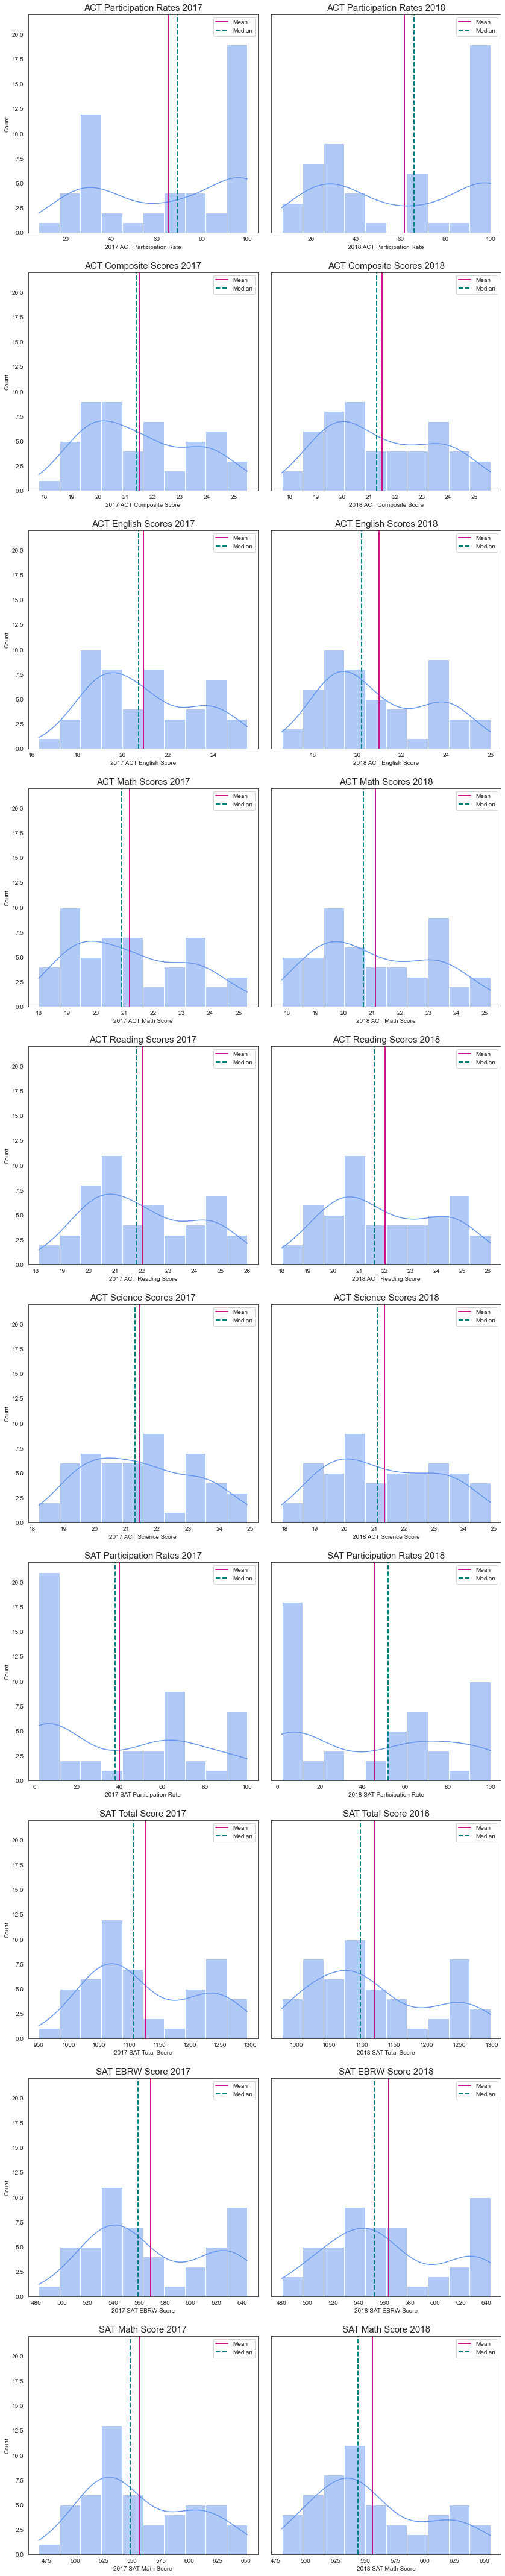

In [88]:
list_of_columns = ["act_participation_2017", "act_participation_2018",
                   "act_composite_2017", "act_composite_2018", 
                   "act_english_2017", "act_english_2018",
                   "act_math_2017", "act_math_2018",
                   "act_reading_2017", "act_reading_2018",
                   "act_science_2017", "act_science_2018", 
                   "sat_participation_2017", "sat_participation_2018",
                   "sat_total_2017", "sat_total_2018",
                   "sat_ebrw_2017", "sat_ebrw_2018", 
                   "sat_math_2017", "sat_math_2018"]

list_of_xlabels = ["2017 ACT Participation Rate", "2018 ACT Participation Rate", 
                  "2017 ACT Composite Score", "2018 ACT Composite Score",
                       "2017 ACT English Score", "2018 ACT English Score", 
                       "2017 ACT Math Score", "2018 ACT Math Score",
                       "2017 ACT Reading Score", "2018 ACT Reading Score",
                       "2017 ACT Science Score", "2018 ACT Science Score",
                       "2017 SAT Participation Rate", "2018 SAT Participation Rate",
                       "2017 SAT Total Score", "2018 SAT Total Score", 
                       "2017 SAT EBRW Score", "2018 SAT EBRW Score",
                       "2017 SAT Math Score", "2018 SAT Math Score"]

list_of_titles = ["ACT Participation Rates 2017", "ACT Participation Rates 2018", 
                     "ACT Composite Scores 2017", "ACT Composite Scores 2018",
                     "ACT English Scores 2017", "ACT English Scores 2018",
                     "ACT Math Scores 2017", "ACT Math Scores 2018",
                     "ACT Reading Scores 2017", "ACT Reading Scores 2018",
                     "ACT Science Scores 2017", "ACT Science Scores 2018",
                     "SAT Participation Rates 2017", "SAT Participation Rates 2018",
                     "SAT Total Score 2017", "SAT Total Score 2018",
                     "SAT EBRW Score 2017", "SAT EBRW Score 2018",
                     "SAT Math Score 2017", "SAT Math Score 2018"]

main_title = ""

subplot_kdehist(final, list_of_columns, list_of_titles, list_of_xlabels, main_title)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Based on the histogram-kde charts above, it does not appear that any of the variable follows a normal distribution. Most of the data in these distributions are not distributed around the mean and have a bimodal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates

Explain your answers for each distribution and how you think this will affect estimates made from these data.

### Math and Reading

Based on the histogram-kde charts above, the distributions for average ACT/SAT Math and Reading scores in 2017 and 2018 are non-normal. 

The test scores in the data are the states averages. Based on the Central Limit Theorem, the larger the sample size is, the more the average test scores distribution approaches the normal distribution. 

However, there might be biasness in the data. For example, states like Wyoming with mandatory ACT test requirement, have low ACT test scores. These same states generally have low SAT participation rates but high SAT test scores. Due to the relatively smaller sample size in low participating states, it could be that those students who take the non-mandatory test come only from a particular group. These students could be the smartest in their cohort or they come from families with higher socio-economic status, enabling them to have the resources to do both tests. The selection bias in the sampling will result in skewed results. Hence, it might not be reasonable to compare the test results of high scoring states with states that have a different participation rate. The sample size and sampling method for states with different participation rates could be different. 


### Rates

Most of the data for the participation rates are centered between 0-10% and 90-100%. These rates are heavily influenced by state policies regarding the SAT/ACT tests. As mentioned above, it is not resonable to compare states with different participation rates. Students who take the non-mandatory test in a low participating state might only come from a specific group.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Due to the biasness in the data, the distribution is not likely to be normal. Conducting statistical inference does not make sense as the normality assumption which these statistical tests require are not satisfied. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

The range of ACT Math score and the range of SAT Math score is different. Hence, it is not appropriate to compare the absolute values for these 2 tests.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

There are three states that experienced a big change in their test participation rates between the period 2017 and 2018. These states are Alaska, Colorado and Illinois.

In 2018, Alaska's ACT participation rate dropped to 33% from 65% in the previous year. Before 2016, Alaska had a state law which made it compulsory for the students to take either the SAT or ACT test in order to graduate. The state also previously provided either one of the tests for free (<a href="https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/">Reference</a>). However, in 2016, it dropped mandatory testing and state-funded test policy altogether, leading to a drop in Alaska's ACT participation rate. Based on the list below, Alaska is now one of the 20 states with no mandatory testing or state-funded test. It is now the state with the lowest SAT and ACT participation rates. The next 2 states with the lowest participation rates are Oregon and Florida.

In 2018, Colorado's ACT participation rate declined to 30% from 100% in the previous year. During the same period, its SAT participation rate increased from 11% to 100% in 2018. The complete shift in the ACT and SAT test participation rates is due to the change in the state testing policy. As of the 2016-2017 year, Colorado went from a mandatory ACT testing state to a mandatory SAT testing state (<a href="https://blog.prepscholar.com/which-states-require-the-sat">Reference</a>). 

Illinois's ACT participation rate declined from 93% in 2017 to 43% in 2018. During the same period, its SAT participation rate increased from 9% to 99% in 2018. Like Colorado, this change is also due to the switch in its state testing policy. A panel of state educators deemed that the SAT is better aligned with the standards of the students in Illinois, prompting the switch (<a href="https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html">Reference</a>). As of the 2016-2017 school year, Illinois went from mandatory ACT testing to mandatory SAT testing for students (<a href="https://blog.prepscholar.com/which-states-require-the-sat">Reference</a>). 

In [89]:
# Identify states with no test requirement and provide no test subsidies

states_no_reg = [] 

for i, state in enumerate(final_add["state"]):
    if (state not in require_act) & (state not in require_sat) & (state not in require_act_or_sat) & (state not in free_act) & (state not in free_sat):
        states_no_reg.append(state)
states_no_reg

['Alaska',
 'Arizona',
 'California',
 'Florida',
 'Georgia',
 'Indiana',
 'Iowa',
 'Kansas',
 'Maryland',
 'Massachusetts',
 'Minnesota',
 'New Jersey',
 'New Mexico',
 'Oregon',
 'Pennsylvania',
 'South Dakota',
 'Texas',
 'Vermont',
 'Virginia',
 'Washington']

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The participation rate for SAT and ACT test for each state is heavily influenced by the state policies. Most of the states with full or near full participation in SAT or ACT test has set policies around it. These policies include making either one of the test mandatory and providing the test for free. 

It has been observed that when one test is made mandatory over the other, it would result in full participation or near full participation for that particular test and a sharp drop in the latter. This is seen in Colorado and Illinois. In 2017, both Colorado and Illinois had full or near full ACT participation. However, when the states switched from mandatory ACT testing to SAT testing, their ACT participation rates dropped drastically. Their SAT participation rates on the other hand, went up to 99-100%. 

There are 20 states with no mandatory testing or state-funded test. These states have generally low SAT and ACT participation rates. One of the 20 states include Oregon.

Oregon has the second lowest ACT and SAT participation rate. As there is no mandatory test set and ACT test has not monopolised the test market in Oregon, there is a big opportunity for growth for SAT test. Additionally, its SAT participation rate in 2018 is slightly higher than its ACT participation rate, indicating that SAT might already have a head start in the state. Hence, the College Board should focus its attention on Oregon and boost the state SAT participation rate. 

Since state influence has demonstrated to be a strong driving force behind test participation, it is important for us to engage with state and local governments. Some of the ways that state or local governments could contribute include providing full or partial test subsidy or state-wide subsidized SAT preparation classes. As there is a positive relationship between income level and SAT participation rate, providing some financial assistance to low-income groups could potentially help to boost SAT participation rate in the state. This relationship needs to be further studied.

Collaboration with nearby states like California and Washington could also be helpful. Like Oregon, these states have no state requirement around the SAT or ACT test. Even so, their SAT participation rates are higher than Oregon's. By working together with them, we could potentially uncover other important factors that would help to boost Oregon's participation rate. 

Additionally, more research could be done to find out the students test preference and the reason behind it. For example, if the SAT test is not the students test of choice, then why is it so? Is it due to the cost, test grading structure, difficulty level of the test or some other reasons? 

Moreover, some students are bound to go to colleges that are outside of their home state. Hence, the test preference of these students are not entirely dependent on Oregon's state policy. It would also be dependent on the policy of the other states and the colleges that they are planning to enrol in. Thus, it would be useful to research on the type of colleges that these students intend to go to after highschool and the respective policies of these colleges. This would likely have an impact on our effort to boost the SAT participation.